<img src="iM_logo.png" width="450px" height="300px"></img>

## iM뱅크 데이터 활용 개인과제
1. iM뱅크 데이터 EDA
2. iM뱅크 데이터를 활용한 개인 주제 선정
3. 개인 주제에 대한 인사이트 도출
- 위 내용을 주피터 노트북으로 작성하여 제출
- 각 내용에 대하여 자세한 설명을 첨부할 것
- 제출 기한 : 2월 10일 오후 4:50분까지 슬랙 DM으로 제출
- 제출파일 : 홍길동.ipynb


# EDA: 카드 거래 데이터 & 고객 데이터 분석

## 1. 데이터 로딩 및 기본 정보 확인

In [1]:
# 데이터 처리 및 시각화 라이브러리 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 한글 폰트 설정
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic') # 맑은 고딕 폰트 선택
plt.rc('axes', unicode_minus=False) # '-' 표시 활성화

### 데이터 불러오기
- 데이터 로드
- 데이터 미리보기
- 데이터 크기 확인
- 컬럼 타입 및 메모리 사용량 확인

In [4]:
# 데이터 로드
card_2021 = pd.read_csv("iMBANK_CARD_DATA_2021(K-DigitalTraining).csv", encoding="CP949")
card_2022 = pd.read_csv("iMBANK_CARD_DATA_2022(K-DigitalTraining).csv", encoding="CP949")
card_2023 = pd.read_csv("iMBANK_CARD_DATA_2023(K-DigitalTraining).csv", encoding="CP949")

# 데이터 미리보기
print("카드 거래 데이터 2021 - 상위 5개 행")
card_2021.head()

카드 거래 데이터 2021 - 상위 5개 행


,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,202112,4080934272,일반한식,경상북도,경주시,5번이하,20000
1,202112,4116127380,일반한식,경상북도,경주시,5번이하,20000
2,202112,2914424833,일반한식,경상북도,경주시,5번이하,20000
3,202112,2950007638,일반한식,경상북도,경주시,5번이하,60000
4,202112,2931907302,일반한식,경상북도,경주시,5번이하,10000


In [5]:

# 가맹점업종명 컬럼에서 중복 제거하여 리스트로 저장
jobs_2021 = card_2021["가맹점업종명"].dropna().unique().tolist()
jobs_2022 = card_2022["가맹점업종명"].dropna().unique().tolist()
jobs_2023 = card_2023["가맹점업종명"].dropna().unique().tolist()


# 결과 출력 (원하면 주석 해제)
print(list(set(jobs_2021 + jobs_2022 + jobs_2023)))

['기타농업관련', '레져업소', '농협하나로클럽', 'DP&E', 'CATV홈쇼핑', '치과의원', 'LPG취급점', '카페트,커튼,천막,지물', '의 원', '가전제품', '건축용 요업제품', '제 화', '유흥주점', '신 발', '통신판매업1', '약 국', '카인테리어', '문구용품', 'SK주유소', '스크린골프', '노 래 방', '슈퍼마켓', '초중고교육기관', '전문서적', '세탁소', '렌터카', '기타의료기관 및 기타의료기기', '서양음식', '소프트웨어', '부동산중개·임대', '농·축·수산품', '혼례서비스업', '스넥', '자동차시트·타이어', '일반한식', '정육점', '인삼제품', 'GS가스충전소', '스포츠·레져용품', '여객선', '전자상거래상품권', '자동차정비', '조명기구', '택시', '손해보험', '공공요금대행서비스/소득공제비대상', '세차장', '시 계', '한약방', '공공요금대행서비스/소득공제대상', '독서실', '비영리/대상', '병 원(응급실운영)', '컴퓨터', '인터넷종합Mall', '업종미등록', '기타가구', '애완동물', '비씨카드 정산용가맹점', '정수기', '음반영상물', '옷감·직물', '한방병원', '액세서리', '기타건강식품', '기타숙박업', '위탁급식업', '수 영 장', '골프경기장', '주차장', '미곡상', '기계공구', '기념품점', '쌍용S-OIL', '비씨카드 정산용(할인)', '윤활유전문판매', '헬스클럽', '일반가구', '안경', '기타대인서비스', '맞춤복점', '비료,사료,종자', '택시회사', '철도', '주점', '사무·통신기기수리', '출판 및 인쇄물', '치과병원', '유류판매', '기타서적문구', '현대정유가스충전소', '사우나', '화장품', '일반서적', '외국어학원', '생명보험', '가 방', '골프용품 전문점', '이용원', '기타레져업소', '기타유통업', 'CATV', '종합레져타운', '수족관', '이동통신요금', '볼 링 장', '농,축협직영매장

In [6]:
len(list(set(jobs_2021 + jobs_2022 + jobs_2023)))

212

=> 승인건수는 5번이하, 5번초과 10번이하, 10번초과 15번 이하, 15번초과 20번이하, 20번초과로 범주화되어 있다.  
승인금액은 월별로 가맹점별 승인된 건들을 합산하여 백만원 이하면 만원 단위 반올림, 이상이면 십만원 단위 반올림된 값이다.

In [4]:
# 데이터 로드
customer_2021 = pd.read_csv("iMBANK_CUSTOMER_DATA_2021(K-DigitalTraining).csv", encoding="CP949")
customer_2022 = pd.read_csv("iMBANK_CUSTOMER_DATA_2022(K-DigitalTraining).csv", encoding="CP949")
customer_2023 = pd.read_csv("iMBANK_CUSTOMER_DATA_2023(K-DigitalTraining).csv", encoding="CP949")

# 데이터 미리보기
print("고객 데이터 2021 - 상위 5개 행")
customer_2021.head()

고객 데이터 2021 - 상위 5개 행


,기준년월,고객ID,연령대,성별,고객등급,자택_시도,자택_시군구,수신_요구불예금,수신_거치식예금,수신_적립식예금,수신_펀드,수신_외화예금,대출금액
0,202112,9999998161,60대이상,여,일반등급,대구광역시,달서구,1400000,0,0,0,0,0
1,202112,9999997589,60대이상,남,일반등급,경상북도,경주시,0,10000000,500000,0,0,0
2,202112,9999991579,60대이상,여,일반등급,경상북도,성주군,0,30000000,0,0,0,0
3,202112,9999989448,60대이상,남,일반등급,대구광역시,달서구,400000,0,0,0,0,0
4,202112,9999988325,60대이상,남,일반등급,대구광역시,달서구,2700000,0,0,0,0,0


In [7]:
# 데이터 크기 확인
print("\n21년 카드 거래 데이터 크기:", card_2021.shape)
print("\n22년 카드 거래 데이터 크기:", card_2022.shape)
print("\n23년 카드 거래 데이터 크기:", card_2023.shape)


21년 카드 거래 데이터 크기: (60672642, 7)

22년 카드 거래 데이터 크기: (62945850, 7)

23년 카드 거래 데이터 크기: (64829377, 7)


=> 카드 거래 데이터는 각 연도별로 6천만개 정도의 행이 존재함.

In [6]:
# 데이터 크기 확인
print("\n21년 고객 데이터 크기:", customer_2021.shape)
print("\n22년 고객 데이터 크기:", customer_2022.shape)
print("\n23년 고객 데이터 크기:", customer_2023.shape)


21년 고객 데이터 크기: (20835992, 13)

22년 고객 데이터 크기: (21578686, 13)

23년 고객 데이터 크기: (22739682, 13)


=> 고객 데이터는 각 연도별로 2천만개 정도의 행이 존재함. 고객 데이터는 월 단위 스냅샷 형태로 저장되었기 때문에 실제로 2천만명 정도의 고객이 있는 것은 아님.

In [9]:
# 기본 정보 확인 (컬럼 타입 및 메모리 사용량 확인)
card_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60672642 entries, 0 to 60672641
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   거래년월      int64 
 1   고객ID      int64 
 2   가맹점업종명    object
 3   가맹점_광역시도  object
 4   가맹점_시군구   object
 5   승인건수      object
 6   승인금액      int64 
dtypes: int64(3), object(4)
memory usage: 3.2+ GB


In [7]:
# 기본 정보 확인 (컬럼 타입 및 메모리 사용량 확인)
customer_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20835992 entries, 0 to 20835991
Data columns (total 13 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   기준년월      int64 
 1   고객ID      int64 
 2   연령대       object
 3   성별        object
 4   고객등급      object
 5   자택_시도     object
 6   자택_시군구    object
 7   수신_요구불예금  int64 
 8   수신_거치식예금  int64 
 9   수신_적립식예금  int64 
 10  수신_펀드     int64 
 11  수신_외화예금   int64 
 12  대출금액      int64 
dtypes: int64(8), object(5)
memory usage: 2.0+ GB


=> 승인건수는 "5번초과 10번이하"와 같이 범주화 되어있기 때문에 object 타입이다.  
   기준년월은 datetime과 같은 날짜형이 아닌 정수형으로 선언되어 있다.  
   고객ID는 유일하게 동일한 컬럼이 카드 거래 데이터셋과 고객 데이터셋에 모두 존재한다.  
   연령대, 성별, 고객등급과 같은 범주형 컬럼은 모두 문자열로 되어있어 object 타입이다.  <br><br>
   
=> 1년치 카드 거래 및 고객 데이터가 5GB를 넘기 때문에 3년치의 모든 데이터를 한꺼번에 불러와서 EDA를 수행하는 것은 메모리 부족으로 인해 불가능하다.

#### 거래년월, 기준년월 datetime으로 형변환하기

In [10]:
# 데이터 타입 변환
# 거래년월, 기준년월을 날짜 형식으로 변환
card_2021['거래년월'] = pd.to_datetime(card_2021['거래년월'], format='%Y%m')
card_2022['거래년월'] = pd.to_datetime(card_2022['거래년월'], format='%Y%m')
card_2023['거래년월'] = pd.to_datetime(card_2023['거래년월'], format='%Y%m')

In [14]:
customer_2021['기준년월'] = pd.to_datetime(customer_2021['기준년월'], format='%Y%m')
customer_2022['기준년월'] = pd.to_datetime(customer_2022['기준년월'], format='%Y%m')
customer_2023['기준년월'] = pd.to_datetime(customer_2023['기준년월'], format='%Y%m')

#### 두 데이터셋에 모두 존재하는 고객ID 컬럼의 연관성 확인하기

In [9]:
# 3년간의 카드 거래 데이터에서 고객ID 컬럼 추출 후 중복 제거
card_customer_ids = pd.concat([card_2021['고객ID'], card_2022['고객ID'], card_2023['고객ID']]).drop_duplicates()

In [10]:
# 중복 제거된 고객ID를 각각 파일로 저장
card_customer_ids.to_csv('card_customer_ids.csv', index=False)

In [6]:
# 3년간의 고객 데이터에서 고객ID 컬럼 추출 후 중복 제거
customer_customer_ids = pd.concat([customer_2021['고객ID'], customer_2022['고객ID'], customer_2023['고객ID']]).drop_duplicates()

In [7]:
# 중복 제거된 고객ID를 각각 파일로 저장
customer_customer_ids.to_csv('customer_customer_ids.csv', index=False)

In [4]:
# 두 파일을 다시 불러오기
card_customer_ids = pd.read_csv('card_customer_ids.csv')
customer_customer_ids = pd.read_csv('customer_customer_ids.csv')

# 각 데이터셋의 행 개수 확인
card_customer_ids_count = len(card_customer_ids)
customer_customer_ids_count = len(customer_customer_ids)

# 중복된 고객ID 값 개수 계산
common_customer_ids = pd.merge(card_customer_ids, customer_customer_ids, on='고객ID', how='inner')
common_customer_ids_count = len(common_customer_ids)

# 결과 출력
print(f"카드 거래 데이터 고객ID 행 개수: {card_customer_ids_count}")
print(f"고객 데이터 고객ID 행 개수: {customer_customer_ids_count}")
print(f"중복된 고객ID 개수: {common_customer_ids_count}")


카드 거래 데이터 고객ID 행 개수: 915217
고객 데이터 고객ID 행 개수: 2000000
중복된 고객ID 개수: 915217


=> 2021~2023년 까지 정확히 2백만명의 고객의 데이터를 받아온 것이다.  
그 중 915217명의 고객들은 카드 거래 데이터도 존재했다. 즉, 카드 거래 내역이 있는 고객들은 모두 고객 데이터에도 행이 존재한다.  
2백만명에서 약 91만명을 뺀 나머지 고객들은 iM뱅크를 이용하지만, 카드 거래를 하지는 않은 고객들이라고 할 수 있다.  

### 고객 수 분석

In [5]:
# 연도별 고유 고객 수 확인
for year, customer_df in zip([2021, 2022, 2023], [customer_2021, customer_2022, customer_2023]):
    unique_customers = customer_df['고객ID'].nunique()
    total_rows = customer_df.shape[0]
    print(f"[{year}년 고객 데이터] 전체 행 수: {total_rows}, 고유 고객 수: {unique_customers}")
    print(f"-> 평균적으로 한 고객당 {total_rows / unique_customers:.2f}개월치 데이터가 존재")

[2021년 고객 데이터] 전체 행 수: 20835992, 고유 고객 수: 1781906
-> 평균적으로 한 고객당 11.69개월치 데이터가 존재
[2022년 고객 데이터] 전체 행 수: 21578686, 고유 고객 수: 1857530
-> 평균적으로 한 고객당 11.62개월치 데이터가 존재
[2023년 고객 데이터] 전체 행 수: 22739682, 고유 고객 수: 1974548
-> 평균적으로 한 고객당 11.52개월치 데이터가 존재


=> 고유 고객 수는 3년간 계속해서 상승세를 유지하고 있고, 2025년 현재 200만명을 훨씬 넘었을 것으로 예상됨.  
=> 거의 대부분의 고객들은 1~12월 고객 데이터가 모두 존재하지만, 신규 고객들이 생겨남에 따라 11.6개월치의 동일 고객 데이터가 연도별로 존재함.

In [ ]:
import matplotlib.colors as mcolors

# 모든 연도 고객 데이터 병합
customer_data = pd.concat([customer_2021, customer_2022, customer_2023])

# 고객ID별 최초 등장 기준년월 찾기
first_month = customer_data.groupby('고객ID')['기준년월'].min()

# 2021년 1월 제외 후 월별 신규 고객 수 계산
new_customers_per_month = first_month[first_month != 202101].value_counts().sort_index()

# 컬러맵 설정 (신규 고객 수가 많을수록 색이 진해짐)
norm = mcolors.Normalize(vmin=new_customers_per_month.min(), vmax=new_customers_per_month.max())
colors = [plt.cm.Blues(norm(value)) for value in new_customers_per_month]

# 시각화 (그라데이션 적용)
plt.figure(figsize=(12, 6))
sns.barplot(x=new_customers_per_month.index, y=new_customers_per_month.values, palette=colors)

plt.xticks(rotation=45)
plt.title("월별 신규 고객 수")
plt.xlabel("기준년월")
plt.ylabel("신규 고객 수")

plt.show()


=> 신규 고객은 거의 모든 월을 대상으로 2023년에 대체로 더 많이 생겨났음을 알 수 있다. 또한 3월은 모든 연도에서 전월보다 눈에 띄게 신규 고객 수가 증가하는 모습이다.

### 결측치 및 이상치 탐색
- 결측치 확인
- 결측치 행들 간 공통점 찾기
- 이상 데이터 탐색

In [5]:
# 결측치 확인
def check_missing_values(df, name):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if len(missing) > 0:
        print(f"\n[{name} 데이터 결측치]")
        print(missing)
    else:
        print(f"\n[{name} 데이터] 결측치 없음")

In [6]:
check_missing_values(card_2021, "21년 카드 거래")
check_missing_values(card_2022, "22년 카드 거래")
check_missing_values(card_2023, "23년 카드 거래")


[21년 카드 거래 데이터 결측치]
가맹점_시군구    28349
dtype: int64

[22년 카드 거래 데이터 결측치]
가맹점_시군구    35353
dtype: int64

[23년 카드 거래 데이터 결측치]
가맹점_시군구    36348
dtype: int64


In [ ]:
check_missing_values(customer_2021, "21년 고객")
check_missing_values(customer_2022, "22년 고객")
check_missing_values(customer_2023, "23년 고객")

카드 거래 데이터와 고객 데이터 모두 시군구 컬럼에서만 결측치가 있음을 확인.  
=> 결측치 행들 간의 어떤 공통점이 있을 것이라는 합리적 의심을 하게 됨.

In [8]:
# 결측치 행들 간 공통점 찾기
for year, card_df in zip([2021, 2022, 2023], [card_2021, card_2022, card_2023]):
    missing_card = card_df[card_df['가맹점_시군구'].isnull()]
    
    # 가맹점_시군구 결측치 중 광역시도가 세종특별자치도인 비율 계산
    missing_card_sejong_ratio = (missing_card['가맹점_광역시도'] == '세종특별자치시').mean() * 100
    
    print(f"\n#### {year}년 카드 거래 데이터에서 가맹점_시군구 결측치 중 세종특별자치시 비율: {missing_card_sejong_ratio:.2f}%")



#### 2021년 카드 거래 데이터에서 가맹점_시군구 결측치 중 세종특별자치시 비율: 100.00%

#### 2022년 카드 거래 데이터에서 가맹점_시군구 결측치 중 세종특별자치시 비율: 100.00%

#### 2023년 카드 거래 데이터에서 가맹점_시군구 결측치 중 세종특별자치시 비율: 100.00%


In [6]:
for year, customer_df in zip([2021, 2022, 2023], [customer_2021, customer_2022, customer_2023]):
    missing_customer = customer_df[customer_df['자택_시군구'].isnull()]
    
    # 가맹점_시군구 결측치 중 광역시도가 세종특별자치도인 비율 계산
    missing_customer_sejong_ratio = (missing_customer['자택_시도'] == '세종특별자치시').mean() * 100
    
    print(f"#### {year}년 고객 데이터에서 자택_시군구 결측치 중 세종특별자치시 비율: {missing_customer_sejong_ratio:.2f}%")

#### 2021년 고객 데이터에서 자택_시군구 결측치 중 세종특별자치시 비율: 100.00%
#### 2022년 고객 데이터에서 자택_시군구 결측치 중 세종특별자치시 비율: 100.00%
#### 2023년 고객 데이터에서 자택_시군구 결측치 중 세종특별자치시 비율: 100.00%


=> 모든 결측치인 행은 세종특별자치시 지역이었고, 세종특별자치시는 시군구 없이 1읍, 9면, 13행정동으로 구성되어 있어서 시군구 컬럼이 모두 결측치인 것으로 볼 수 있다.

#### 이상 데이터 탐색

In [9]:
# 카드 승인금액(1천만원 이상 0원 처리), 금융상품(1억 이상 0원 처리) 건수 확인.
print("\n[승인금액이 0원인 데이터 개수]")
print("21년: ", card_2021[card_2021['승인금액'] == 0].shape[0])
print("22년: ", card_2022[card_2022['승인금액'] == 0].shape[0])
print("23년: ", card_2023[card_2023['승인금액'] == 0].shape[0])


[승인금액이 0원인 데이터 개수]
21년:  0
22년:  0
23년:  0


=> 승인금액이 0원인 데이터는 하나도 없었음. 일반적으로 500만원의 1회 결제 한도가 있다보니까 천만원 이상일 경우 0원 처리는 의미가 없었을 것으로 추정.

In [4]:
zero_financial_21 = (customer_2021[['수신_요구불예금', '수신_거치식예금', '수신_적립식예금', '수신_펀드', '수신_외화예금', '대출금액']] == 0).sum()
zero_financial_22 = (customer_2022[['수신_요구불예금', '수신_거치식예금', '수신_적립식예금', '수신_펀드', '수신_외화예금', '대출금액']] == 0).sum()
zero_financial_23 = (customer_2023[['수신_요구불예금', '수신_거치식예금', '수신_적립식예금', '수신_펀드', '수신_외화예금', '대출금액']] == 0).sum()
print("\n[금융상품들 중 0원이 포함되어 있는 고객 데이터 건수]")
print("21년: ", zero_financial_21)
print("22년: ", zero_financial_22)
print("23년: ", zero_financial_23)


[금융상품들 중 0원이 포함되어 있는 고객 데이터 건수]
21년:  수신_요구불예금     5240376
수신_거치식예금    19355039
수신_적립식예금    16415569
수신_펀드       20328143
수신_외화예금     20691773
대출금액        18750202
dtype: int64
22년:  수신_요구불예금     5981748
수신_거치식예금    19965413
수신_적립식예금    17148097
수신_펀드       21114027
수신_외화예금     21443329
대출금액        19334696
dtype: int64
23년:  수신_요구불예금     7304563
수신_거치식예금    20639227
수신_적립식예금    18361377
수신_펀드       22324838
수신_외화예금     22605718
대출금액        19901818
dtype: int64


=> 0원이 너무 많아 진짜 상품에 가입되지 않은 것인지, 1억 이상의 금액으로 가입이 되어 있는 것인지 구분할 수 없음.

## 2. 카드 거래 데이터 분석

### 연도별/월별 거래량 및 승인금액 분포
- 연도별 승인금액 바 플롯
- 월별 승인금액 추이

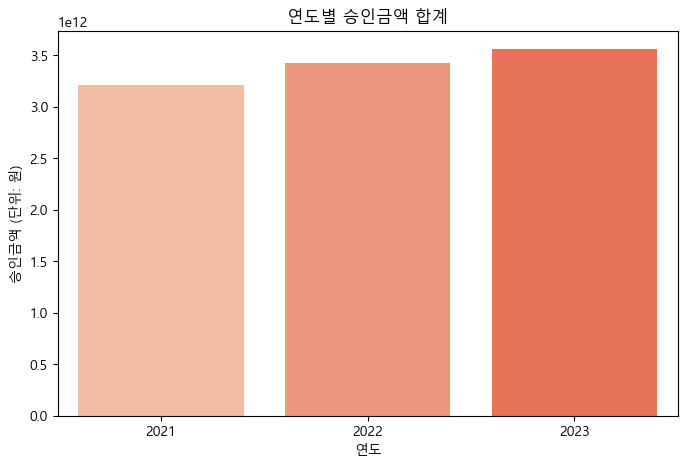

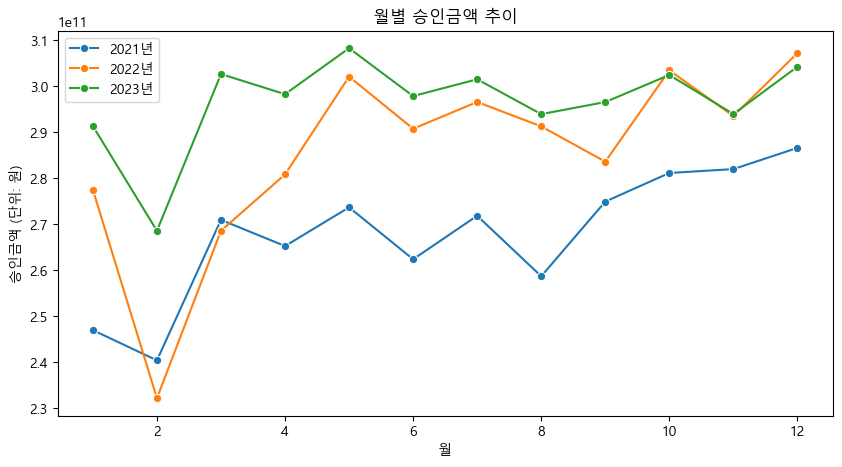

In [9]:
import matplotlib.colors as mcolors

# 연도별 승인금액 합계 계산
yearly_totals = {
    2021: card_2021['승인금액'].sum() / (1 + 0.025),
    2022: card_2022['승인금액'].sum() / (1 + 0.051),
    2023: card_2023['승인금액'].sum() / (1 + 0.036),
}

# 연도별 승인금액 바 플롯 (그라데이션 적용)
fig, ax = plt.subplots(figsize=(8, 5))
colors = list(mcolors.LinearSegmentedColormap.from_list("gradient", ["#FFDDC1", "#FF5733"])([0.3, 0.6, 0.9]))

sns.barplot(x=list(yearly_totals.keys()), y=list(yearly_totals.values()), palette=colors, ax=ax)
ax.set_title("연도별 승인금액 합계")
ax.set_xlabel("연도")
ax.set_ylabel("승인금액 (단위: 원)")

plt.show()

# 월별 승인금액 추이 (연도별 색상 구분)
fig, ax = plt.subplots(figsize=(10, 5))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # 연도별로 구분되는 색상
for df, year, color in zip([card_2021, card_2022, card_2023], [2021, 2022, 2023], colors):
    monthly_data = df.groupby(df['거래년월'].dt.month)['승인금액'].sum()
    sns.lineplot(x=monthly_data.index, y=monthly_data.values, marker="o", label=f"{year}년", color=color, ax=ax)

ax.set_title("월별 승인금액 추이")
ax.set_xlabel("월")
ax.set_ylabel("승인금액 (단위: 원)")
ax.legend()

plt.show()


=> iM뱅크의 카드 승인금액 합은 3.5조까지 매년 증가세를 보여주고 있다.  
매년 2월에는 승인금액이 크게 감소했다가 다음달부터 바로 다시 회복하는 추세를 보이는 공통점이 있다.  
겨울에 소비가 위축이 되는 국내 소비 패턴이 반영된 것으로 추정한다.

- 물가상승률을 고려했을 때도 소비가 증가하는 경향인지 확인해보자.

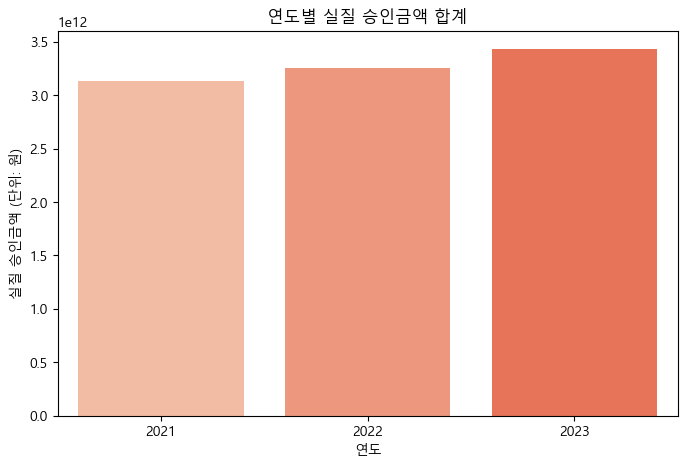

In [12]:
# 연도별 실질 승인금액 합계 계산
yearly_totals = {
    2021: card_2021['승인금액'].sum() * 0.975,
    2022: card_2022['승인금액'].sum() * 0.949,
    2023: card_2023['승인금액'].sum() * 0.964,
}

# 연도별 실질 승인금액 바 플롯 (그라데이션 적용)
fig, ax = plt.subplots(figsize=(8, 5))
colors = list(mcolors.LinearSegmentedColormap.from_list("gradient", ["#FFDDC1", "#FF5733"])([0.3, 0.6, 0.9]))

sns.barplot(x=list(yearly_totals.keys()), y=list(yearly_totals.values()), palette=colors, ax=ax)
ax.set_title("연도별 실질 승인금액 합계")
ax.set_xlabel("연도")
ax.set_ylabel("실질 승인금액 (단위: 원)")

plt.show()

=> ▲2021년 2.5% ▲2022년 5.1% ▲2023년 3.6% 의 소비자물가지수를 고려하여 실질 승인금액을 계산했을 때도 상승세는 꺾이지 않았다.
    
- 소비자물가지수(CPI)는 소비자가 구입하는 상품과 서비스의 가격변동을 측정하기 위한 지표다.  
통계청에서 전국 37개 도시 481개 상품과 서비스 품목을 대상으로 매월 지수 형태로 발표하는데,  
전년 대비 물가가 얼마나 올랐는지를 볼 수 있는 주요 통계다.

### 가맹점 업종별 승인금액 및 승인건수 분석
- 가맹점 업종별 승인금액 합계를 시각화하여 업종별 소비 규모를 파악
- 승인건수 범주(5번 이하, 5~10번 등)별 승인금액 평균을 분석하여 소비 패턴을 확인
- 연도별 트렌드를 비교하여 특정 업종이 증가하는지 감소하는지 파악

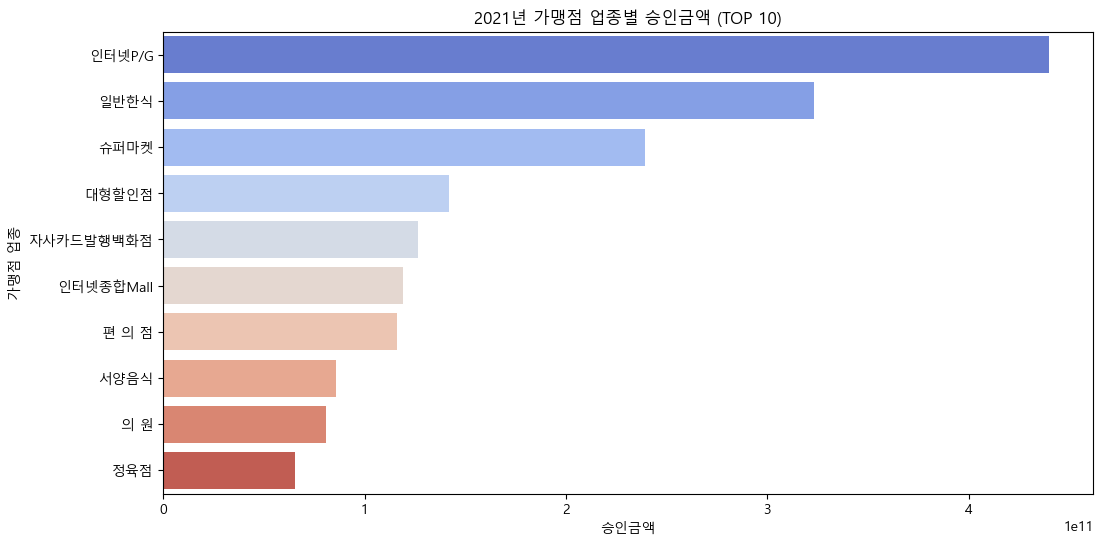

In [15]:
# 가맹점 업종별 승인금액 및 승인건수 분석
plt.figure(figsize=(12, 6))
genre_total = card_2021.groupby('가맹점업종명')['승인금액'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=genre_total.values, y=genre_total.index, palette='coolwarm')
plt.title("2021년 가맹점 업종별 승인금액 (TOP 10)")
plt.xlabel("승인금액")
plt.ylabel("가맹점 업종")
plt.show()

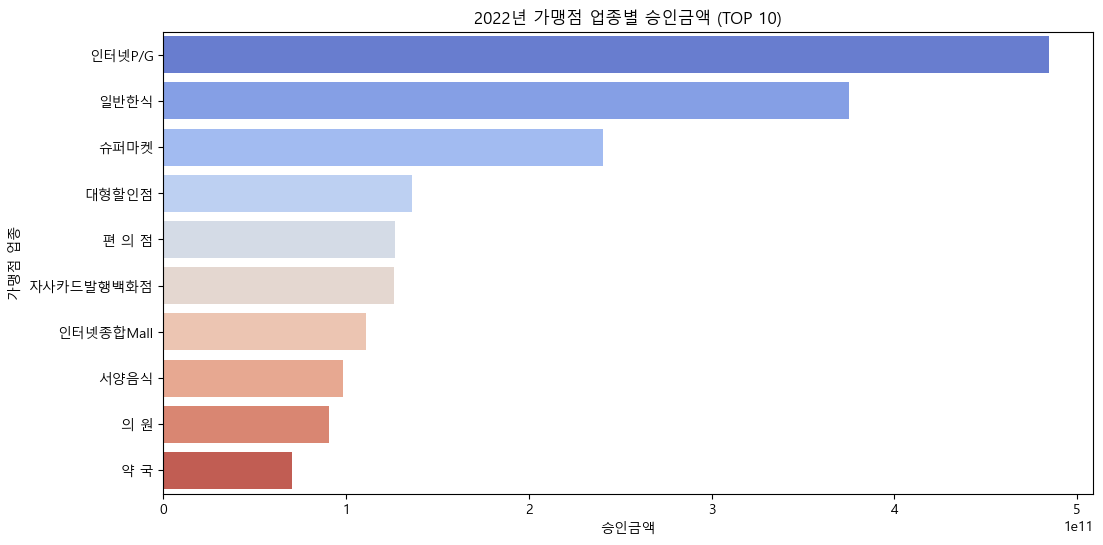

In [17]:
# 가맹점 업종별 승인금액 및 승인건수 분석
plt.figure(figsize=(12, 6))
genre_total = card_2022.groupby('가맹점업종명')['승인금액'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=genre_total.values, y=genre_total.index, palette='coolwarm')
plt.title("2022년 가맹점 업종별 승인금액 (TOP 10)")
plt.xlabel("승인금액")
plt.ylabel("가맹점 업종")
plt.show()

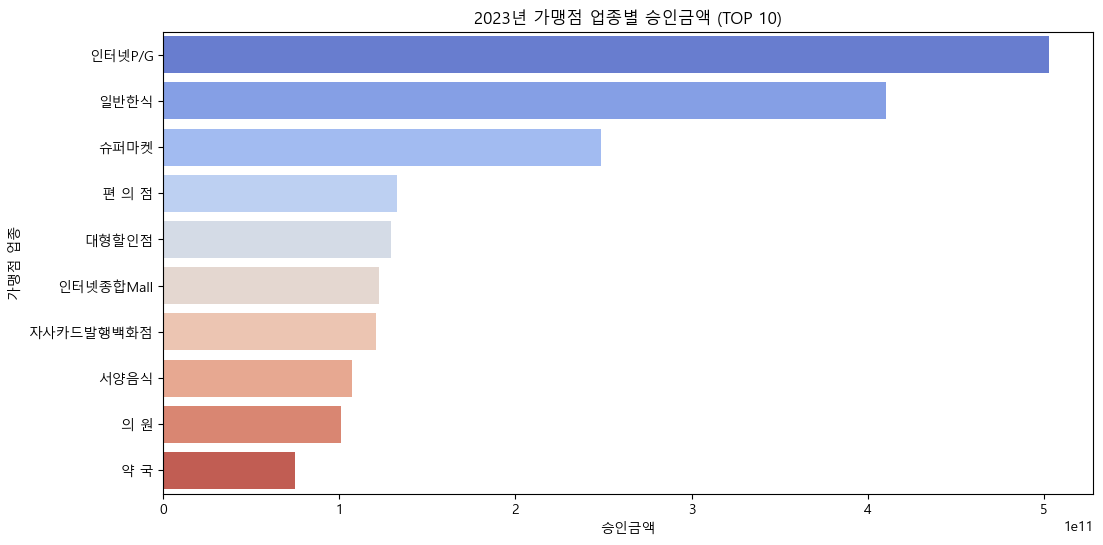

In [19]:
# 가맹점 업종별 승인금액 분석
plt.figure(figsize=(12, 6))
genre_total = card_2023.groupby('가맹점업종명')['승인금액'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=genre_total.values, y=genre_total.index, palette='coolwarm')
plt.title("2023년 가맹점 업종별 승인금액 (TOP 10)")
plt.xlabel("승인금액")
plt.ylabel("가맹점 업종")
plt.show()

=> 2021~2023년 모두 승인금액 TOP3 업종은 인터넷P/G, 일반한식, 슈퍼마켓으로 같았다.  
인터넷 결제대행, 일반한식, 슈퍼마켓 업종을 위주로 카드 혜택을 제공하는 것이 신규 고객 유치와 기존 고객 유지에 효과적인 방법이 될 수 있다.

=>서양음식보다는 한식으로 훨씬 더 많은 사람들이 식사를 해결하는 것을 알 수 있고,  
편의점 업종 승인금액이 2021년에는 대형할인점보다 꽤 낮았지만 시간이 갈수록 순위가 상승하여 2023년에는 대형할인점 승인금액을 넘어서는 모습이다. 1인가구가 증가함에 따라 편의점에서 식사 및 생활 문제를 해결하는 경우가 많아져서 이런 추세가 나타난 걸로 추정함.

In [5]:
# 승인건수 범주를 수치형 중간값으로 변환
def convert_approval_count(category):
    mapping = {'5번이하': 2.5, '5번초과 10번이하': 7.5, '10번초과 15번이하': 12.5, '15번초과 20번이하': 17.5, '20번 초과': 22.5}
    return mapping.get(category, np.nan)

card_2021['승인건수_수치'] = card_2021['승인건수'].apply(convert_approval_count)
card_2022['승인건수_수치'] = card_2022['승인건수'].apply(convert_approval_count)
card_2023['승인건수_수치'] = card_2023['승인건수'].apply(convert_approval_count)

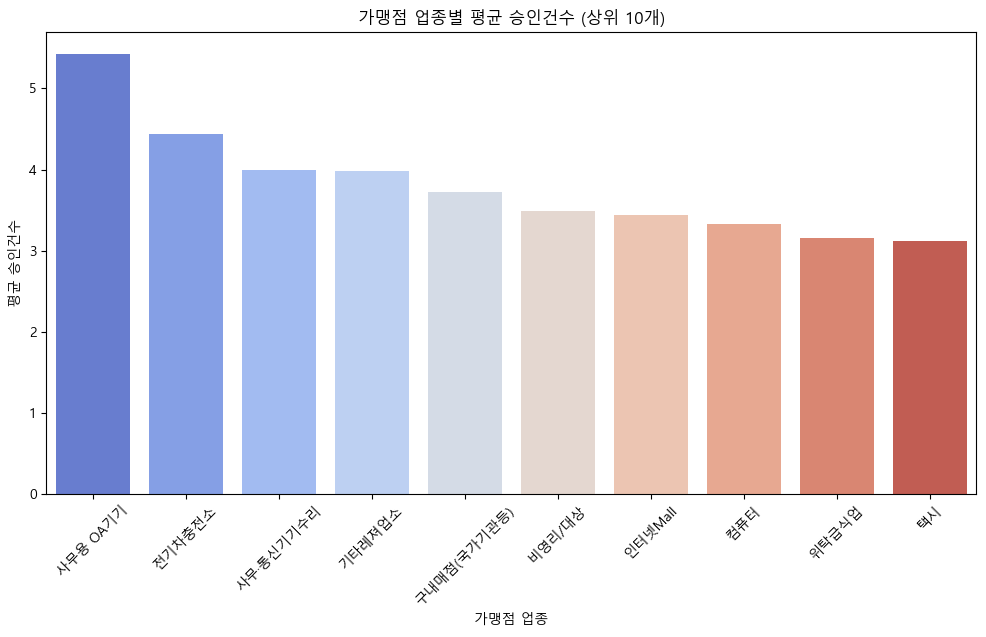

In [17]:
# 가맹점 업종별 승인건수 평균 분석
plt.figure(figsize=(12, 6))
approval_avg = card_2021.groupby('가맹점업종명')['승인건수_수치'].mean().sort_values(ascending=False)
sns.barplot(x=approval_avg.index[:10], y=approval_avg.values[:10], palette='coolwarm')
plt.xticks(rotation=45)
plt.title("가맹점 업종별 평균 승인건수 (상위 10개)")
plt.xlabel("가맹점 업종")
plt.ylabel("평균 승인건수")
plt.show()

=> 평균 승인건수가 많은 업종 1위, 3위가 모두 사무 관련 업종이었다. 범주화형 승인건수를 중간값으로 임의 치환하여 신뢰도가 조금 떨어지는 추정치긴 하지만, 사무 관련 소비는 동일한 장소에서 반복적으로 소비하려는 경향이 있다.  
2위인 전기차충전소는 주변에 많지가 않기 때문에 이용했던 충전소를 계속해서 이용하는 경향이 있다.

### 지역별 거래 패턴 분석
- 대구 vs. 비대구 지역 비교
- 광역시도별 승인금액 및 승인건수 분석
- 시군구 단위의 거래 패턴 탐색

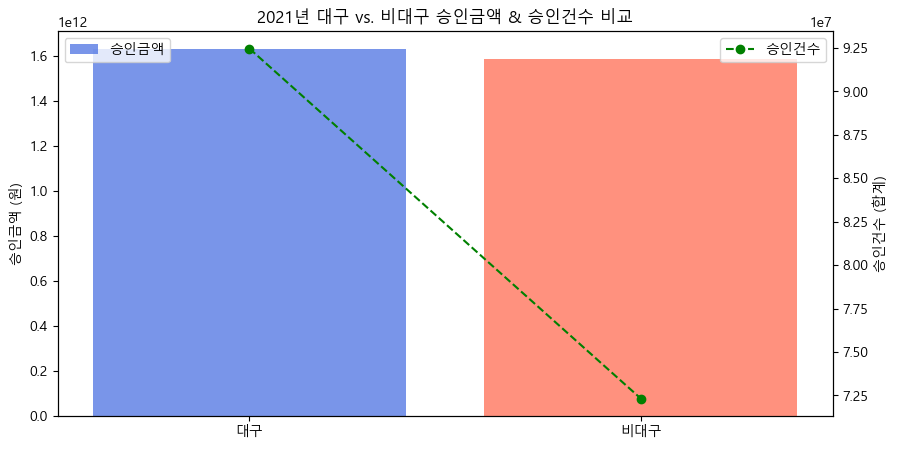

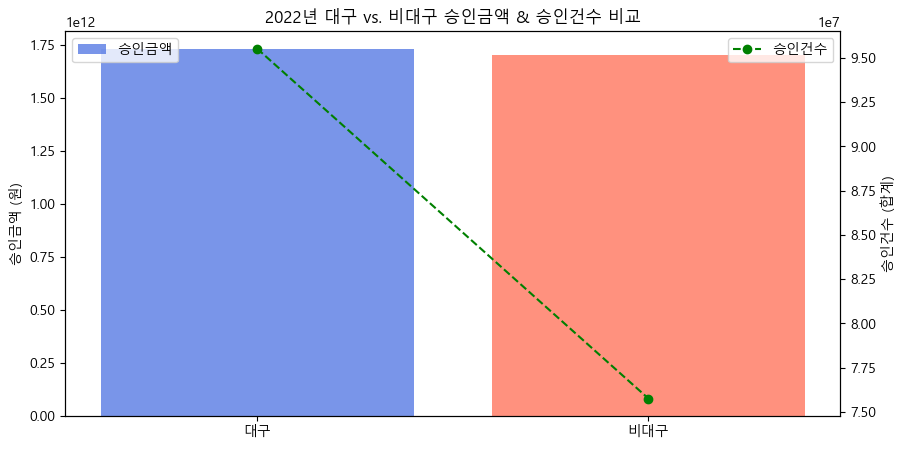

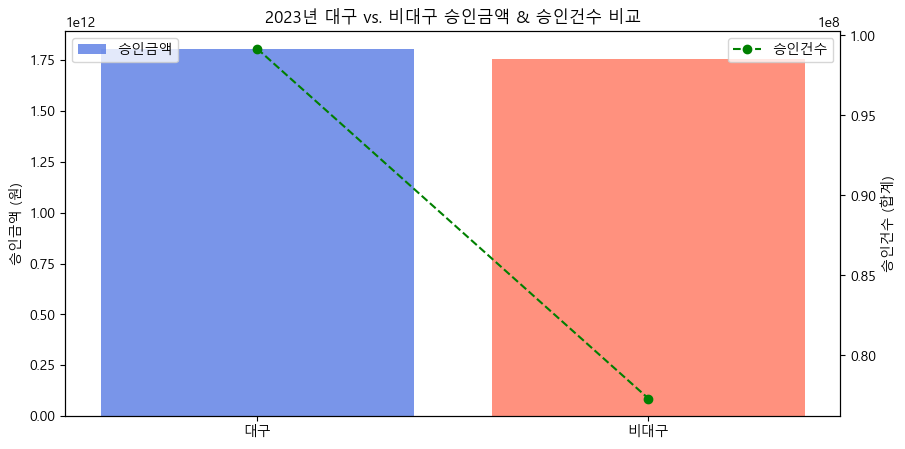

In [16]:
# 대구 vs. 비대구 지역 비교 (승인건수 및 승인금액)

# 대구와 비대구를 구분하는 컬럼 생성
card_2021['지역구분'] = card_2021['가맹점_광역시도'].apply(lambda x: '대구' if x == '대구광역시' else '비대구')
card_2022['지역구분'] = card_2022['가맹점_광역시도'].apply(lambda x: '대구' if x == '대구광역시' else '비대구')
card_2023['지역구분'] = card_2023['가맹점_광역시도'].apply(lambda x: '대구' if x == '대구광역시' else '비대구')

# 연도별 승인금액 및 승인건수 비교
def plot_region_comparison(card_data, year):
    region_summary = card_data.groupby('지역구분').agg({'승인건수_수치': 'sum', '승인금액': 'sum'}).reset_index()

    fig, ax1 = plt.subplots(figsize=(10, 5))
    
    # 승인금액 바차트
    ax1.bar(region_summary['지역구분'], region_summary['승인금액'], color=['royalblue', 'tomato'], alpha=0.7, label='승인금액')
    ax1.set_ylabel("승인금액 (원)")
    
    # 승인건수 라인차트
    ax2 = ax1.twinx()
    ax2.plot(region_summary['지역구분'], region_summary['승인건수_수치'], marker='o', color='green', linestyle='dashed', label='승인건수')
    ax2.set_ylabel("승인건수 (합계)")
    
    ax1.set_title(f"{year}년 대구 vs. 비대구 승인금액 & 승인건수 비교")
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    plt.show()

# 연도별 시각화
plot_region_comparison(card_2021, 2021)
plot_region_comparison(card_2022, 2022)
plot_region_comparison(card_2023, 2023)


=> 대구와 비대구의 승인금액 규모가 비슷한 것을 볼 수 있다. 승인건수는 추정치이지만 대구와 비대구 모두 조금씩 늘어나는 것을 볼 수 있다.

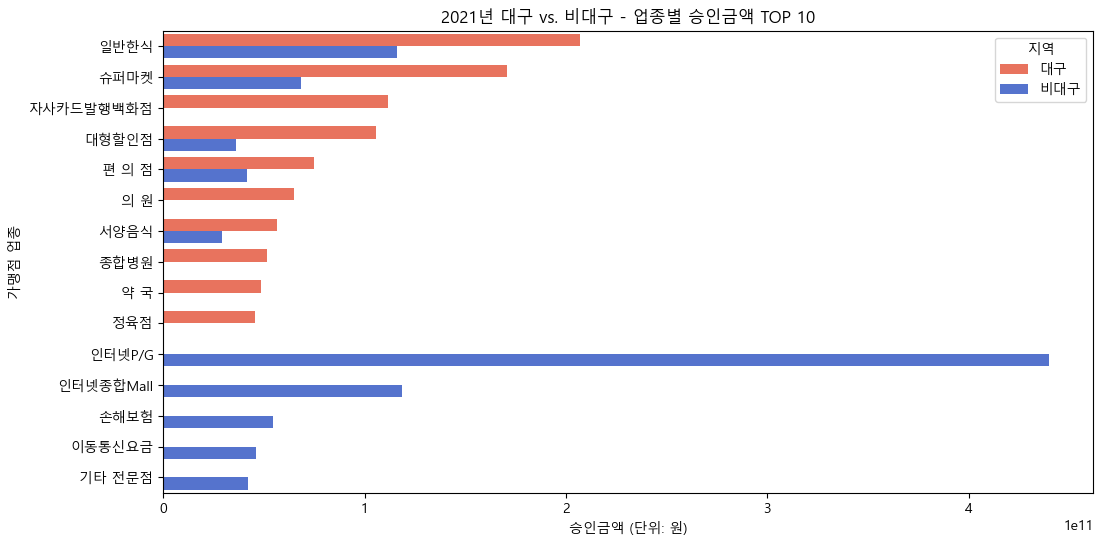

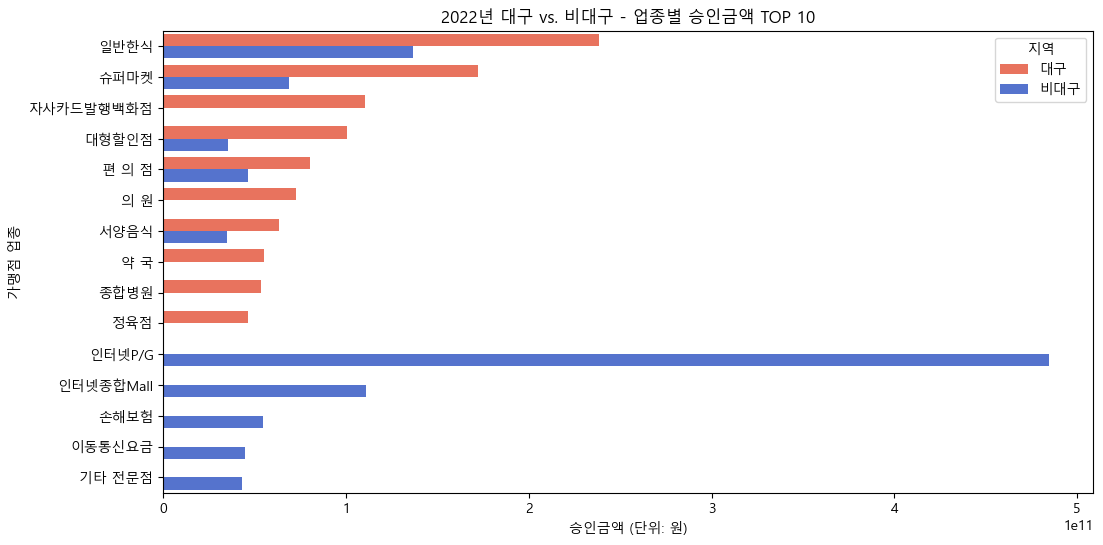

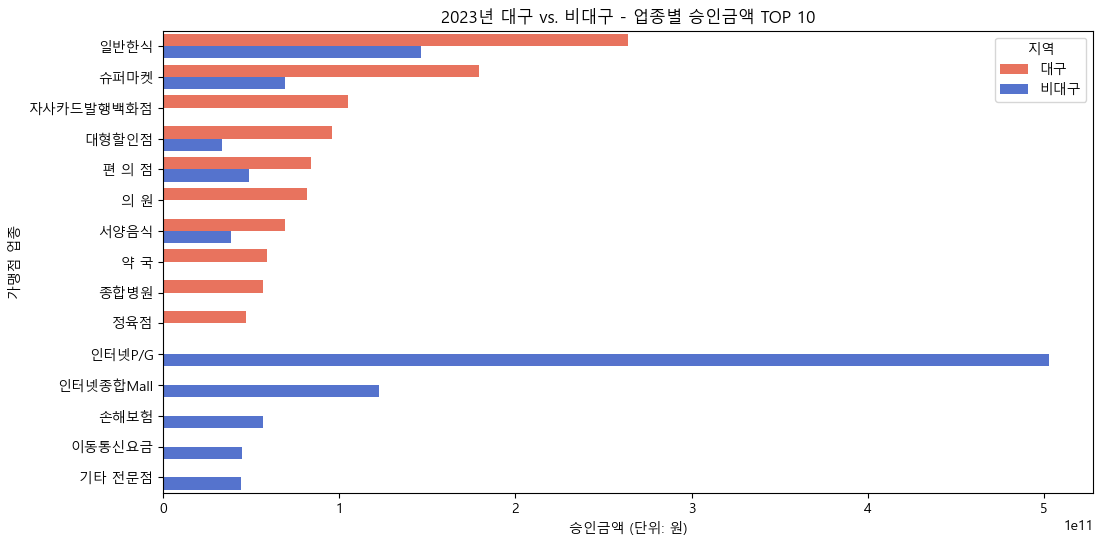

In [18]:
# 가맹점 업종별 승인금액 분석 (대구 vs. 비대구)
def plot_top_merchants_by_region(card_data, year, top_n=10):
    region_merchant = card_data.groupby(['지역구분', '가맹점업종명'])['승인금액'].sum().reset_index()
    top_merchants = region_merchant.groupby('지역구분').apply(lambda x: x.nlargest(top_n, '승인금액')).reset_index(drop=True)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_merchants, x='승인금액', y='가맹점업종명', hue='지역구분', palette=['tomato', 'royalblue'])
    plt.title(f"{year}년 대구 vs. 비대구 - 업종별 승인금액 TOP {top_n}")
    plt.xlabel("승인금액 (단위: 원)")
    plt.ylabel("가맹점 업종")
    plt.legend(title="지역")
    plt.show()

# 연도별 시각화 실행
plot_top_merchants_by_region(card_2021, 2021)
plot_top_merchants_by_region(card_2022, 2022)
plot_top_merchants_by_region(card_2023, 2023)

=> 비대구 지역 승인금액은 인터넷P/G, 인터넷종합Mall, 손해보험, 이동통신요금과 같이 본사가 수도권에 있어 대구 지역 결제로 볼 수가 없는 금액들이 많은 비중을 차지하는 것을 볼 수 있다.  
=> 약국, 종합병원, 정육점에서는 비대구 지역 결제가 전혀 없는 것을 볼 수 있고, 아직 시중은행화 발표 이전의 데이터기 때문에 당연한 결과라고 볼 수 있다.

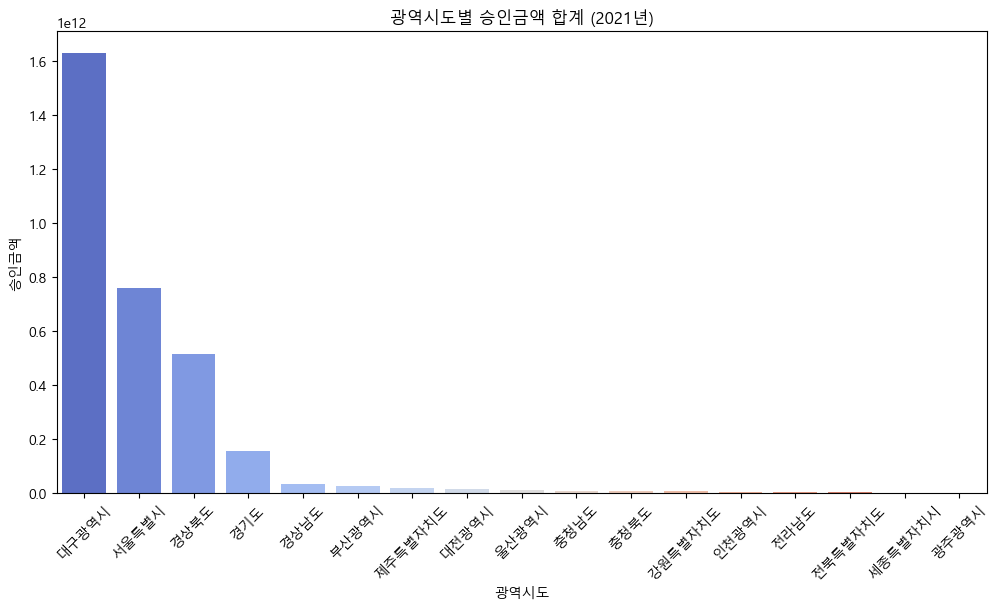

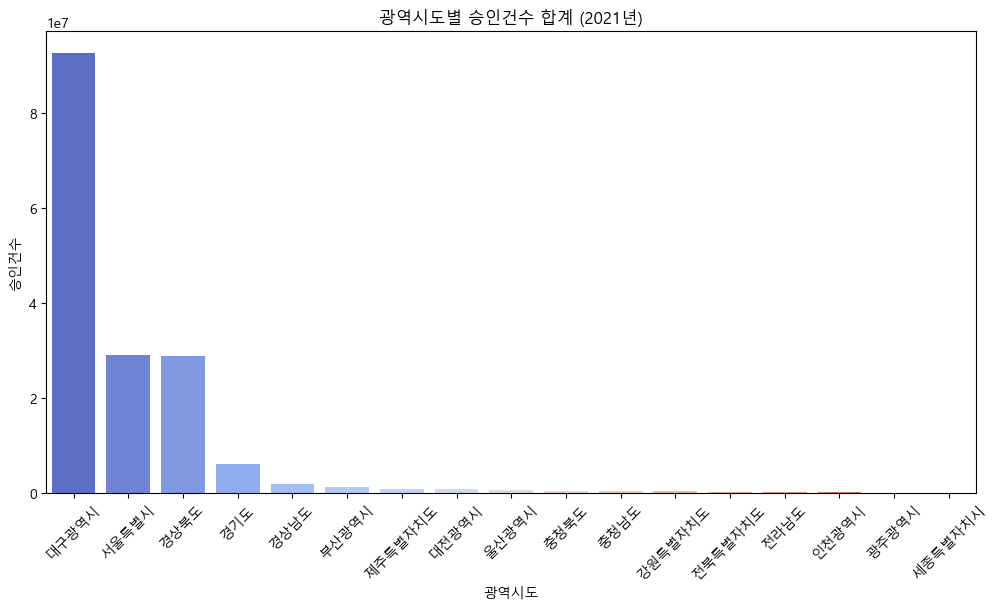

In [8]:
# 광역시도별 승인금액 및 승인건수 분석
plt.figure(figsize=(12, 6))

# 승인금액 합계 계산
region_amount = card_2021.groupby('가맹점_광역시도')['승인금액'].sum().reset_index()
region_amount = region_amount.sort_values(by='승인금액', ascending=False)

# 승인금액 시각화
sns.barplot(data=region_amount, x='가맹점_광역시도', y='승인금액', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("광역시도별 승인금액 합계 (2021년)")
plt.xlabel("광역시도")
plt.ylabel("승인금액")
plt.show()

# 승인건수 합계 계산
plt.figure(figsize=(12, 6))
region_count = card_2021.groupby('가맹점_광역시도')['승인건수_수치'].sum().reset_index()
region_count = region_count.sort_values(by='승인건수_수치', ascending=False)

# 승인건수 시각화
sns.barplot(data=region_count, x='가맹점_광역시도', y='승인건수_수치', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("광역시도별 승인건수 합계 (2021년)")
plt.xlabel("광역시도")
plt.ylabel("승인건수")
plt.show()


=> 서울특별시가 승인금액과 건수 모두 대구광역시 다음으로 가장 높았다. 이유가 무엇일까? 인구가 많아서일까?

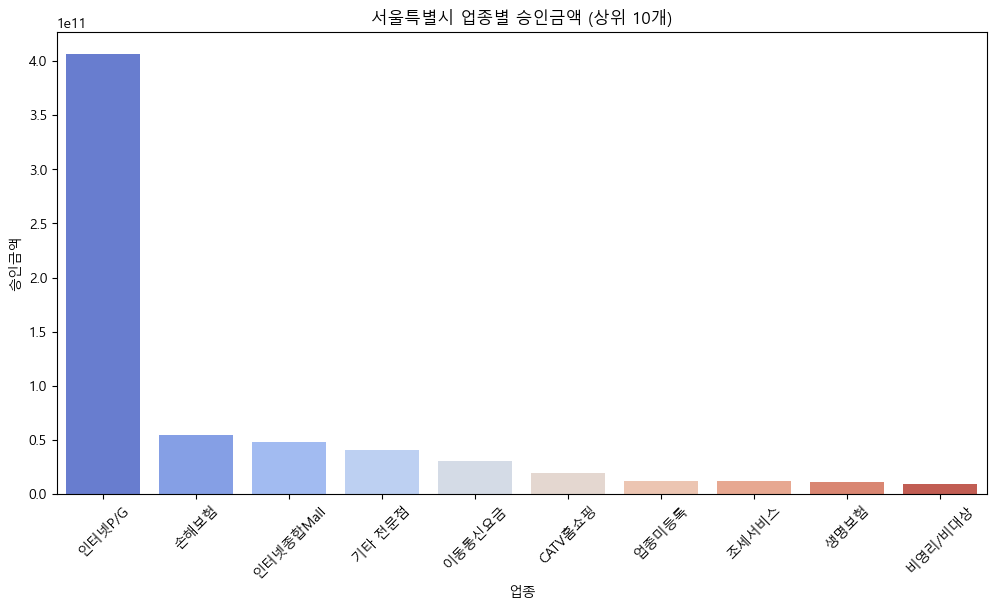

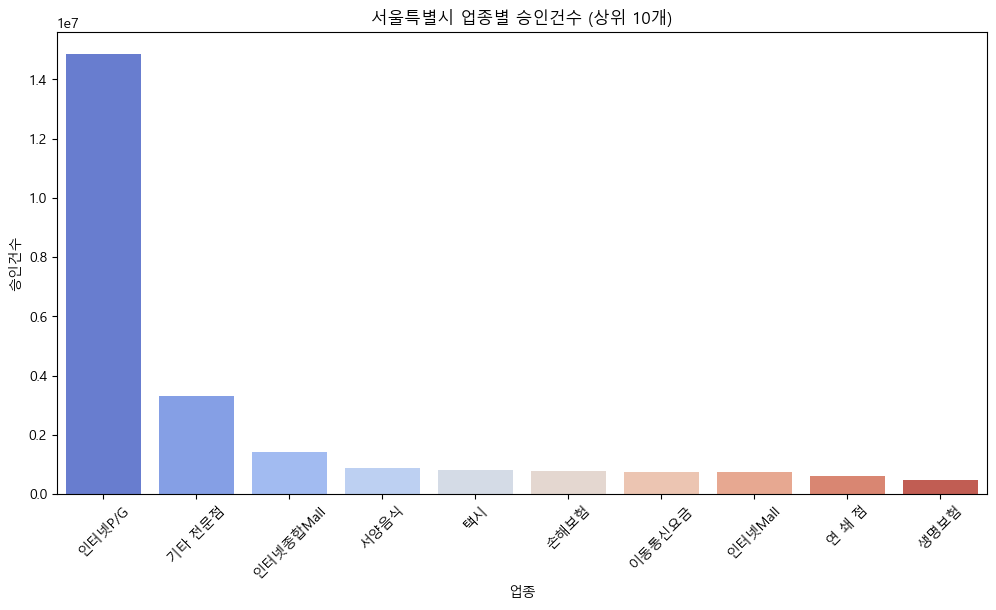

In [9]:
# 서울특별시에서 승인된 데이터만 필터링
seoul_data = card_2021[card_2021['가맹점_광역시도'] == '서울특별시']

# 업종별 승인금액 합산
seoul_amount = seoul_data.groupby('가맹점업종명')['승인금액'].sum().reset_index()
seoul_amount = seoul_amount.sort_values(by='승인금액', ascending=False).head(10)  # 상위 10개 업종

# 업종별 승인건수 합산
seoul_count = seoul_data.groupby('가맹점업종명')['승인건수_수치'].sum().reset_index()
seoul_count = seoul_count.sort_values(by='승인건수_수치', ascending=False).head(10)  # 상위 10개 업종

# 승인금액 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=seoul_amount, x='가맹점업종명', y='승인금액', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("서울특별시 업종별 승인금액 (상위 10개)")
plt.xlabel("업종")
plt.ylabel("승인금액")
plt.show()

# 승인건수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=seoul_count, x='가맹점업종명', y='승인건수_수치', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("서울특별시 업종별 승인건수 (상위 10개)")
plt.xlabel("업종")
plt.ylabel("승인건수")
plt.show()


=> 서울특별시로 승인된 결제 데이터 중 인터넷P/G 업종이 금액으로 보나 건수로 보나 압도적으로 높았다.

In [10]:
# 인터넷P/G 업종만 필터링
internet_pg_data = card_2021[card_2021['가맹점업종명'] == '인터넷P/G']

# 인터넷P/G 업종 전체 승인금액과 승인건수
total_pg_amount = internet_pg_data['승인금액'].sum()
total_pg_count = internet_pg_data['승인건수_수치'].sum()

# 서울특별시에서 결제된 인터넷P/G 승인금액과 승인건수
seoul_pg_data = internet_pg_data[internet_pg_data['가맹점_광역시도'] == '서울특별시']
seoul_pg_amount = seoul_pg_data['승인금액'].sum()
seoul_pg_count = seoul_pg_data['승인건수_수치'].sum()

# 서울특별시 비율 계산
seoul_pg_amount_ratio = (seoul_pg_amount / total_pg_amount) * 100
seoul_pg_count_ratio = (seoul_pg_count / total_pg_count) * 100

# 결과 출력
print(f"인터넷P/G 업종 전체 승인금액: {total_pg_amount:,.0f}원")
print(f"서울특별시 인터넷P/G 승인금액: {seoul_pg_amount:,.0f}원")
print(f"서울특별시 인터넷P/G 승인금액 비율: {seoul_pg_amount_ratio:.2f}%")

print(f"인터넷P/G 업종 전체 승인건수: {total_pg_count:,.0f}건")
print(f"서울특별시 인터넷P/G 승인건수: {seoul_pg_count:,.0f}건")
print(f"서울특별시 인터넷P/G 승인건수 비율: {seoul_pg_count_ratio:.2f}%")


인터넷P/G 업종 전체 승인금액: 439,869,080,000원
서울특별시 인터넷P/G 승인금액: 406,450,210,000원
서울특별시 인터넷P/G 승인금액 비율: 92.40%
인터넷P/G 업종 전체 승인건수: 16,343,912건
서울특별시 인터넷P/G 승인건수: 14,853,542건
서울특별시 인터넷P/G 승인건수 비율: 90.88%


=> 매년 가장 높은 비율을 차지했던 인터넷P/G 승인금액 중 서울특별시가 90% 넘게 차지하고 있었기 때문에 전체로 보더라도 서울특별시가 승인된 결제 금액, 건수가 2번째로 높게 나온 것이다.  
인터넷 결제대행의 경우 일반적으로 본사의 주소로 결제지역이 찍힐 것이라 가맹점이 서울로 많이 나오는 것 같다.

#### 시군구별 승인금액 분포 분석 (2023년 기준)

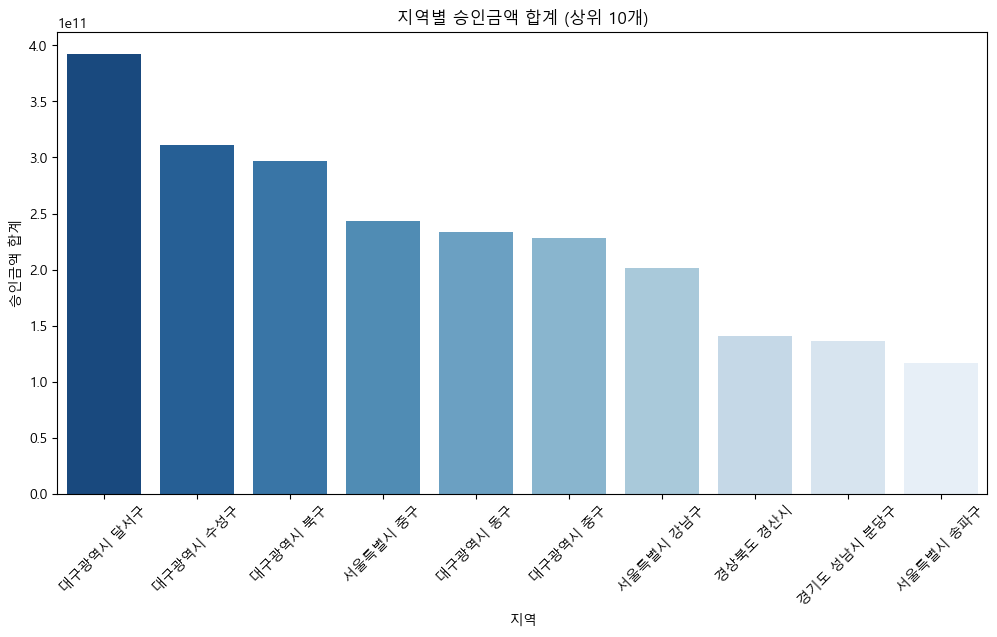

In [8]:
# 시군구별 승인금액 합계 및 평균 계산
sigungu_analysis = card_2023.groupby(["가맹점_광역시도", "가맹점_시군구"])["승인금액"].agg(["sum", "mean"]).reset_index()
sigungu_analysis.columns = ["가맹점_광역시도", "가맹점_시군구", "승인금액_합계", "승인금액_평균"]

# 광역시도 + 시군구 합쳐서 새로운 라벨 생성
sigungu_analysis["지역"] = sigungu_analysis["가맹점_광역시도"] + " " + sigungu_analysis["가맹점_시군구"]

# 승인금액 합계 기준 상위 10개 지역
plt.figure(figsize=(12, 6))
sns.barplot(data=sigungu_analysis.sort_values(by="승인금액_합계", ascending=False)[:10], 
            x="지역", y="승인금액_합계", palette="Blues_r")
plt.xticks(rotation=45)
plt.title("지역별 승인금액 합계 (상위 10개)")
plt.xlabel("지역")
plt.ylabel("승인금액 합계")
plt.show()


=> 2023년 기준 대구, 서울, 경산 순으로 많은 금액을 결제한 지역구들이 나왔다. 시중은행화를 위한 거점의 위치를 고려할 때 생각할 부분 중 하나라고 할 수 있다.

                지역     가맹점업종명          승인금액
20984     서울특별시 중구     인터넷P/G  131259580000
20114    서울특별시 송파구     인터넷P/G   90682230000
17748    서울특별시 강남구     인터넷P/G   89386880000
18587    서울특별시 구로구     인터넷P/G   78057340000
3428   경기도 성남시 분당구  인터넷종합Mall   71939920000
...            ...        ...           ...
23780     전라남도 신안군       일반한식       8300000
23006     전라남도 곡성군       일반한식       4920000
24952  전북특별자치도 임실군       일반한식       2740000
5380       경기도 연천군       일반한식       2420000
2989      경기도 동두천시       일반한식       2140000

[241 rows x 3 columns]


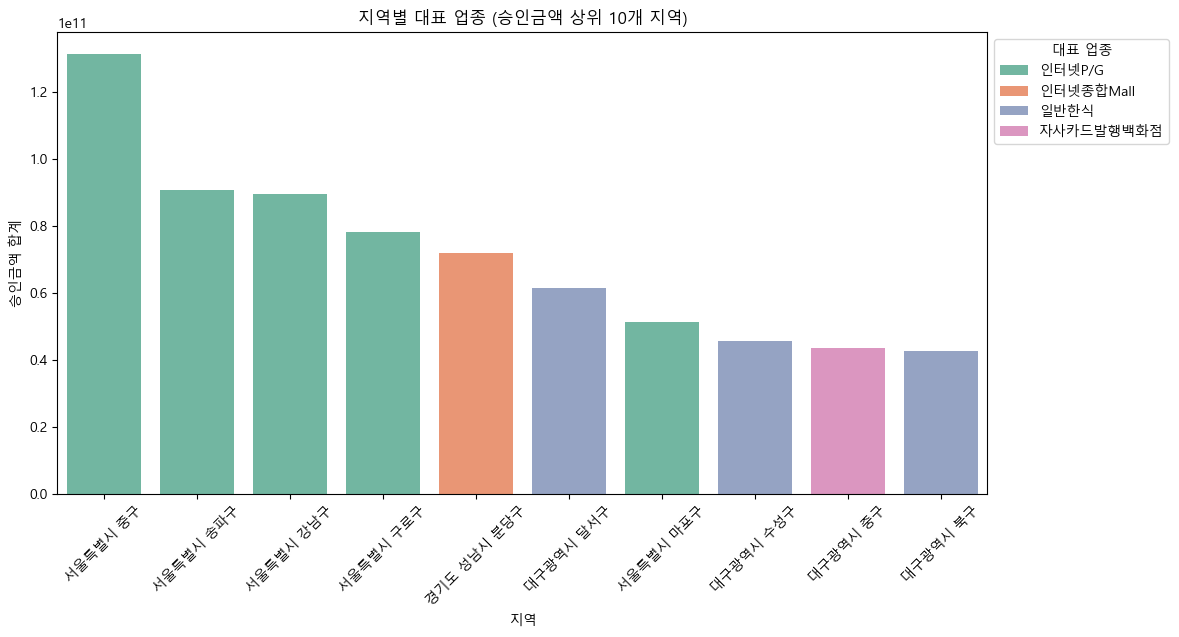

In [9]:
# 특정 지역에서 두드러지는 업종 분석

# 지역별 업종별 승인금액 합계 계산
region_industry_analysis = card_2023.groupby(["가맹점_광역시도", "가맹점_시군구", "가맹점업종명"])["승인금액"].sum().reset_index()

# 광역시도 + 시군구 합쳐서 새로운 라벨 생성
region_industry_analysis["지역"] = region_industry_analysis["가맹점_광역시도"] + " " + region_industry_analysis["가맹점_시군구"]

# 각 지역에서 승인금액이 가장 높은 업종 확인
top_industry_per_region = region_industry_analysis.loc[region_industry_analysis.groupby("지역")["승인금액"].idxmax()]

# 결과 출력
print(top_industry_per_region[["지역", "가맹점업종명", "승인금액"]].sort_values(by="승인금액", ascending=False))

# 상위 10개 지역의 대표 업종 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=top_industry_per_region.sort_values(by="승인금액", ascending=False)[:10], 
            x="지역", y="승인금액", hue="가맹점업종명", dodge=False, palette="Set2")
plt.xticks(rotation=45)
plt.title("지역별 대표 업종 (승인금액 상위 10개 지역)")
plt.xlabel("지역")
plt.ylabel("승인금액 합계")
plt.legend(title="대표 업종", bbox_to_anchor=(1, 1))
plt.show()


=> 업종 기준으로 분류하여 승인금액을 합했을 때, 서울 지역의 인터넷P/G 업종이 승인금액이 가장 높았음을 알 수 있다.

### 고객별 승인건수 및 승인금액 분포 확인

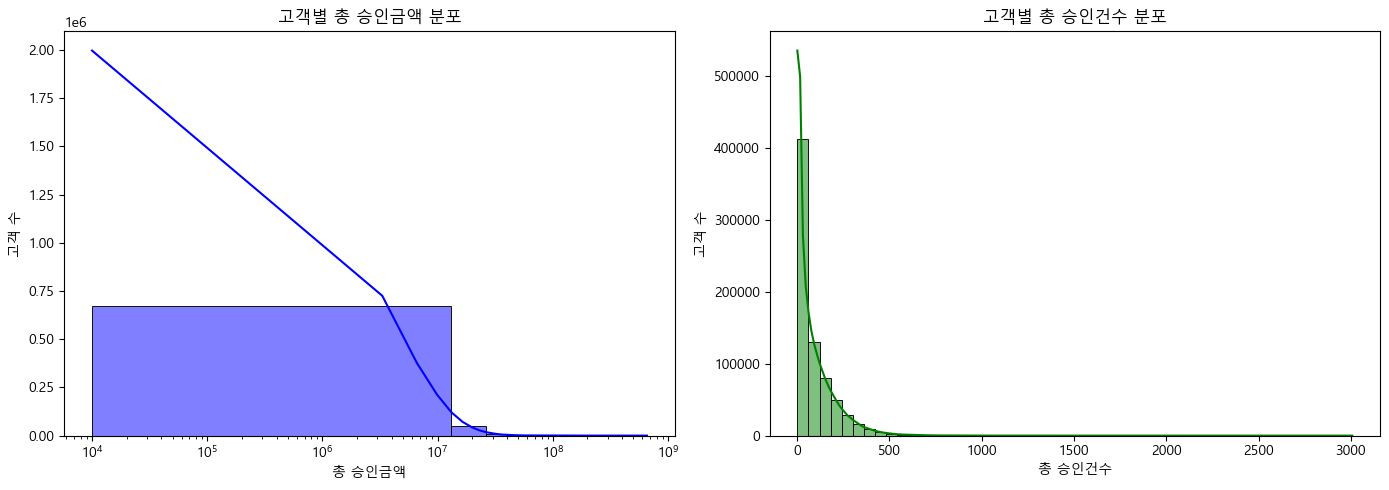

In [9]:
# 고객별 승인건수 및 승인금액 분포 확인 (2023년 기준)
customer_analysis = card_2023.groupby("고객ID")["승인금액"].agg(["sum", "count"]).reset_index()
customer_analysis.columns = ["고객ID", "총 승인금액", "총 승인건수"]

# 승인금액과 승인건수의 분포 확인 (히스토그램)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(customer_analysis["총 승인금액"], bins=50, kde=True, ax=axes[0], color="blue")
axes[0].set_title("고객별 총 승인금액 분포")
axes[0].set_xlabel("총 승인금액")
axes[0].set_ylabel("고객 수")
axes[0].set_xscale("log")  # 로그 스케일 적용

sns.histplot(customer_analysis["총 승인건수"], bins=50, kde=True, ax=axes[1], color="green")
axes[1].set_title("고객별 총 승인건수 분포")
axes[1].set_xlabel("총 승인건수")
axes[1].set_ylabel("고객 수")

plt.tight_layout()
plt.show()


=> 연간 만원~천만원 정도를 결제하신 고객들이 거의 전체를 구성하고 있지만 10억 가까이 사용한 고객도 존재함을 볼 수 있다.  
=> 승인건수로 보면 대부분의 고객들은 500번 이하의 승인 요청을 했지만 연간 3천번 결제를 요청한 고객도 있음을 볼 수 있다.

## 3. 고객 데이터 분석

### 연령대 및 성별 분포

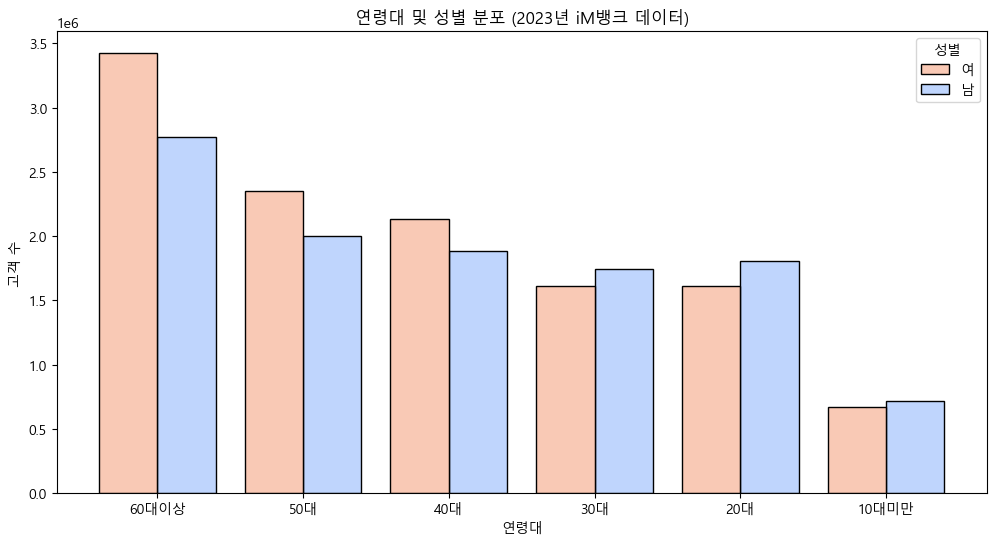

In [9]:
# 고객 데이터 분석 - 연령대 및 성별 분포
fig, ax = plt.subplots(figsize=(12, 6))

# 고객 데이터 바 플롯
sns.histplot(data=customer_2023, x="연령대", hue="성별", multiple="dodge", shrink=0.8, palette="coolwarm_r", stat="count", ax=ax)
ax.set_ylabel("고객 수")
ax.set_title("연령대 및 성별 분포 (2023년 iM뱅크 데이터)")

plt.show()

=> 우선 고객 데이터 분석의 경우, 가장 최근 데이터셋인 2023년 데이터를 활용하여 가장 최근까지의 신규 고객들을 포함하여 기본적인 데이터 확인 및 EDA를 수행한다.  
=> 30대 이하 범주에서는 남성 고객이 더 많지만, 40대 이상 부터는 여성 고객이 더 많은 특징을 보인다.  

### 고객등급별 금융상품 보유 현황

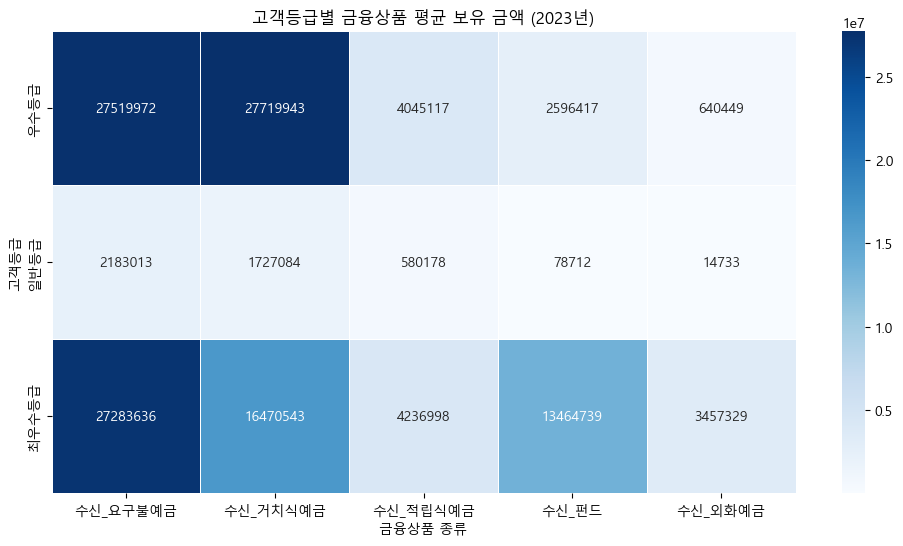

In [6]:
# 고객 데이터 분석 - 고객등급별 금융상품 보유 현황
fig, ax = plt.subplots(figsize=(12, 6))

# 금융상품 컬럼 리스트
financial_columns = ["수신_요구불예금", "수신_거치식예금", "수신_적립식예금", "수신_펀드", "수신_외화예금"]

# 고객등급별 금융상품 평균 보유 금액 계산
df_financial = customer_2023.groupby("고객등급")[financial_columns].mean()

# 데이터 시각화
sns.heatmap(df_financial, annot=True, fmt=".0f", cmap="Blues", linewidths=0.5, ax=ax)
ax.set_title("고객등급별 금융상품 평균 보유 금액 (2023년)")
plt.xlabel("금융상품 종류")
plt.ylabel("고객등급")
plt.show()

=> 우수등급과 최우수등급 고객 모두 요구불예금과 거치식예금 상품에 평균적으로 2천만원 정도는 들어가 있고, 최우수등급 고객의 경우 추가적으로 펀드와 외화예금까지 꽤 많은 금액으로 이용을 하고 있음을 알 수 있다.

### 지역별 금융상품 및 대출 현황 분석

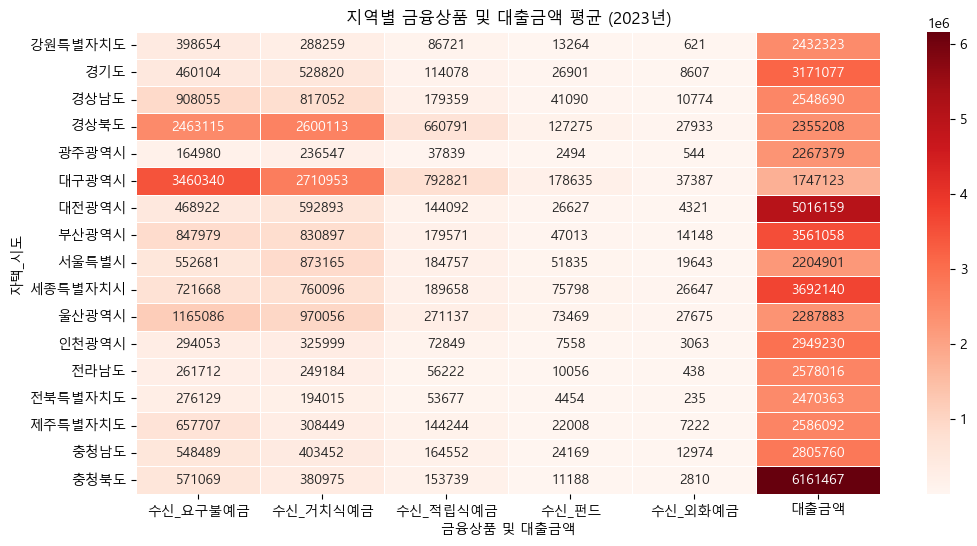

In [10]:
# 고객 데이터 분석 - 지역별 금융상품 및 대출 현황 분석
fig, ax = plt.subplots(figsize=(12, 6))

# 지역별 금융상품 및 대출금액 평균 계산
df_region_finance = customer_2023.groupby("자택_시도")[financial_columns + ["대출금액"]].mean()

# 히트맵 시각화
sns.heatmap(df_region_finance, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, ax=ax)
ax.set_title("지역별 금융상품 및 대출금액 평균 (2023년)")
plt.xlabel("금융상품 및 대출금액")
plt.ylabel("자택_시도")
plt.show()

=> 2023년 기준 대출금액과 외화예금을 제외한 모든 금융상품은 일반적인 개인 고객들이 가장 많을 수 밖에 없는 경북, 대구 지역이 가장 평균 금액이 높았다.  
=> 대출금액의 경우 충북과 대전 지역이 평균적으로 높았다. 타지역 은행을 사용하는 이유는 대출을 위한 수단이 되는 경우가 많기 때문에 고객 수는 많지 않지만 대출금액은 높아 이러한 결과가 나온 것 같다. 

### 금융상품과 대출금액 간의 관계 탐색

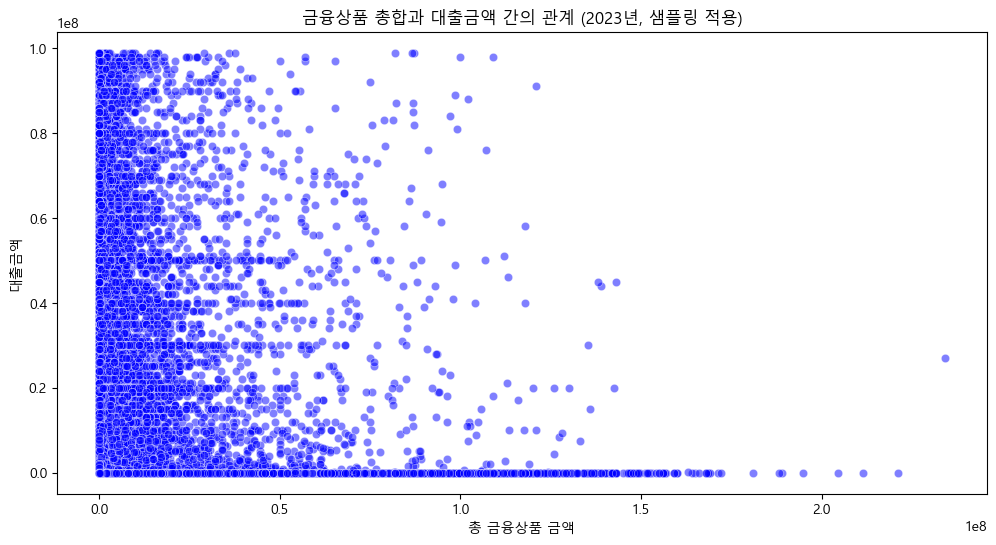

In [13]:
# 금융상품과 대출금액 간의 관계 탐색 (샘플링 적용)
fig, ax = plt.subplots(figsize=(12, 6))

# 1% 샘플링 적용
customer_sample = customer_2023.sample(frac=0.01, random_state=42)

# 금융상품 총합 계산
customer_sample["총_금융상품"] = customer_sample[financial_columns].sum(axis=1)

# 금융상품 총합과 대출금액의 관계 시각화
sns.scatterplot(data=customer_sample, x="총_금융상품", y="대출금액", alpha=0.5, color='blue', ax=ax)
ax.set_xlabel("총 금융상품 금액")
ax.set_ylabel("대출금액")
ax.set_title("금융상품 총합과 대출금액 간의 관계 (2023년, 샘플링 적용)")
plt.show()

=> 데이터 개수가 너무 많아 산점도의 경우 밀집되어 관계가 잘 보이지 않을 것 같아 1% 샘플링을 적용했다.  
=> 뚜렷한 관계는 없어보인다.

### 연령대 및 성별에 따른 대출금액 분포

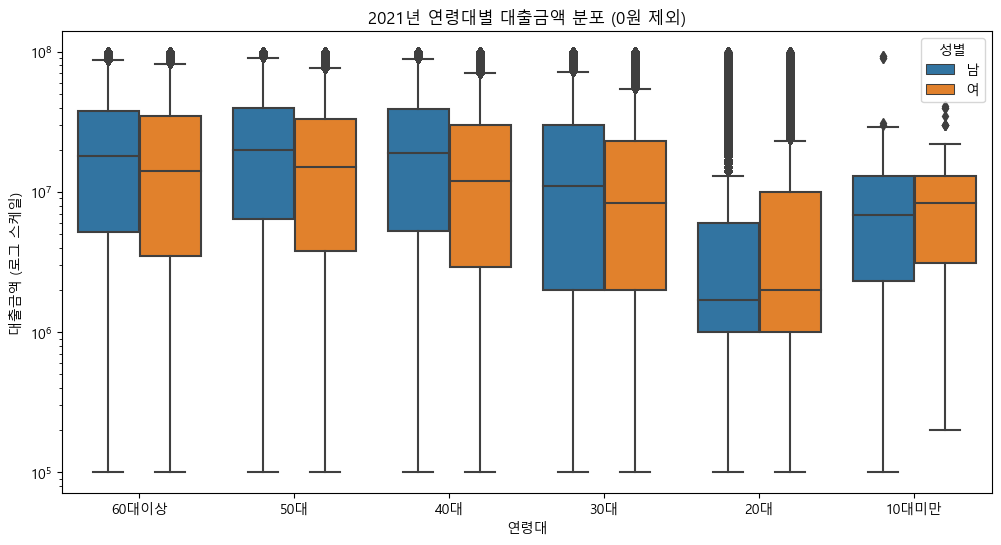

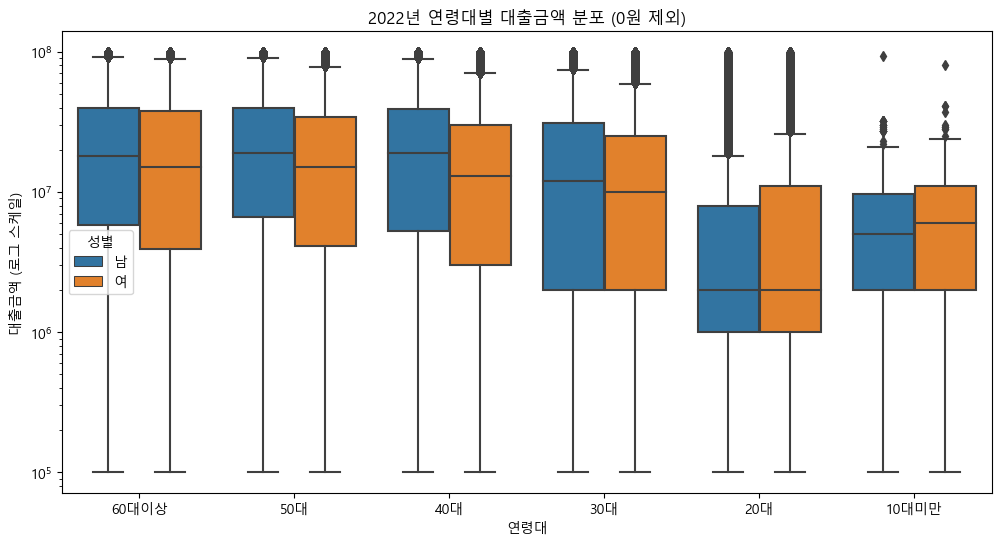

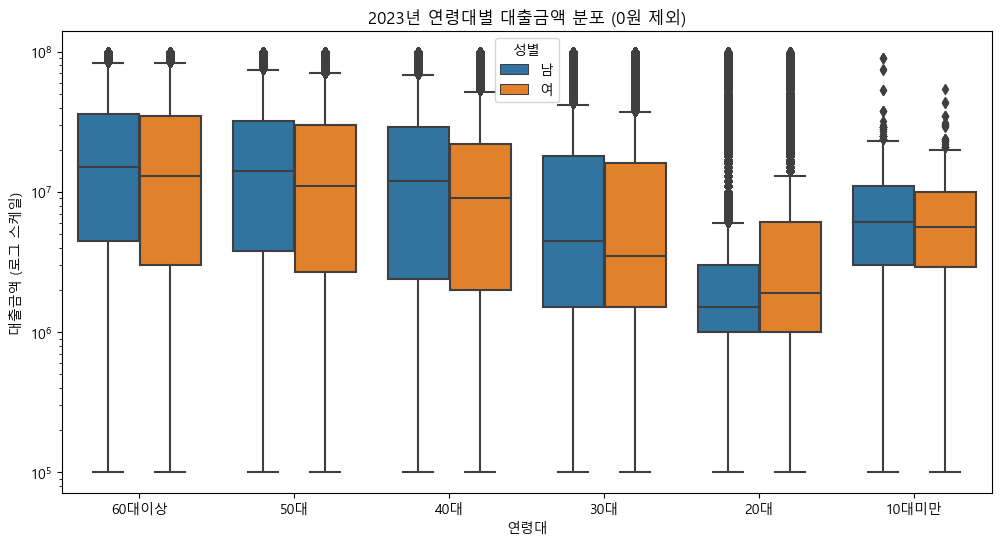

In [17]:
for year, customer_df in zip([2021, 2022, 2023], [customer_2021, customer_2022, customer_2023]):
    plt.figure(figsize=(12, 6))
    
    # 대출금액이 0원이 아닌 데이터만 필터링
    non_zero_loans = customer_df[customer_df['대출금액'] > 0]
    
    sns.boxplot(x='연령대', y='대출금액', hue='성별', data=non_zero_loans)
    plt.yscale('log')  # 로그 스케일 적용 (대출금액 범위가 클 경우)
    plt.title(f"{year}년 연령대별 대출금액 분포 (0원 제외)")
    plt.xlabel("연령대")
    plt.ylabel("대출금액 (로그 스케일)")
    plt.legend(title="성별")
    plt.show()


=> 10대에도 대출금액이 있는 고객이 있다는게 조금 이상하고, 20대의 경우 더 고연령대에 비해 평균적인 대출금액은 낮지만 1억까지의 이상치로 분류되는 고객 케이스가 정말 많았다. 사업을 시작하는 연령대도 낮아지고, 주식이나 코인 같은 투자에도 적극적인 20대의 현재 트렌드가 보이는 모습이다.

## 4. 카드 거래 데이터와 고객 데이터 연계 분석

### 연령대/성별별 소비 패턴 분석

- 연령대 및 성별에 따른 승인금액 및 승인건수 차이
- 연령대별 선호하는 업종 분석

In [4]:
card_2023 = pd.read_csv("iMBANK_CARD_DATA_2023(K-DigitalTraining).csv", encoding="CP949")
customer_2023 = pd.read_csv("iMBANK_CUSTOMER_DATA_2023(K-DigitalTraining).csv", encoding="CP949")

In [5]:
# 2023년 데이터 중 카드 거래 데이터와 고객 데이터가 모두 존재하는 고객만 필터링
valid_customers = set(customer_2023["고객ID"]).intersection(set(card_2023["고객ID"]))
customer_2023 = customer_2023[customer_2023["고객ID"].isin(valid_customers)]
card_2023 = card_2023[card_2023["고객ID"].isin(valid_customers)]

In [5]:
# 승인건수 범주를 수치형 중간값으로 변환
def convert_approval_count(category):
    mapping = {'5번이하': 2.5, '5번초과 10번이하': 7.5, '10번초과 15번이하': 12.5, '15번초과 20번이하': 17.5, '20번 초과': 22.5}
    return mapping.get(category, np.nan)

card_2023['승인건수'] = card_2023['승인건수'].apply(convert_approval_count)

In [8]:
# 고객ID별 최신 데이터 선택 (기준년월이 가장 최근인 데이터)
latest_customer_data = customer_2023.sort_values(by="기준년월").groupby("고객ID").last()

# 연령대 및 성별 정보 추가 (merge 없이 처리)
card_2023["연령대"] = card_2023["고객ID"].map(latest_customer_data["연령대"])
card_2023["성별"] = card_2023["고객ID"].map(latest_customer_data["성별"])
card_2023["고객등급"] = card_2023["고객ID"].map(latest_customer_data["고객등급"])

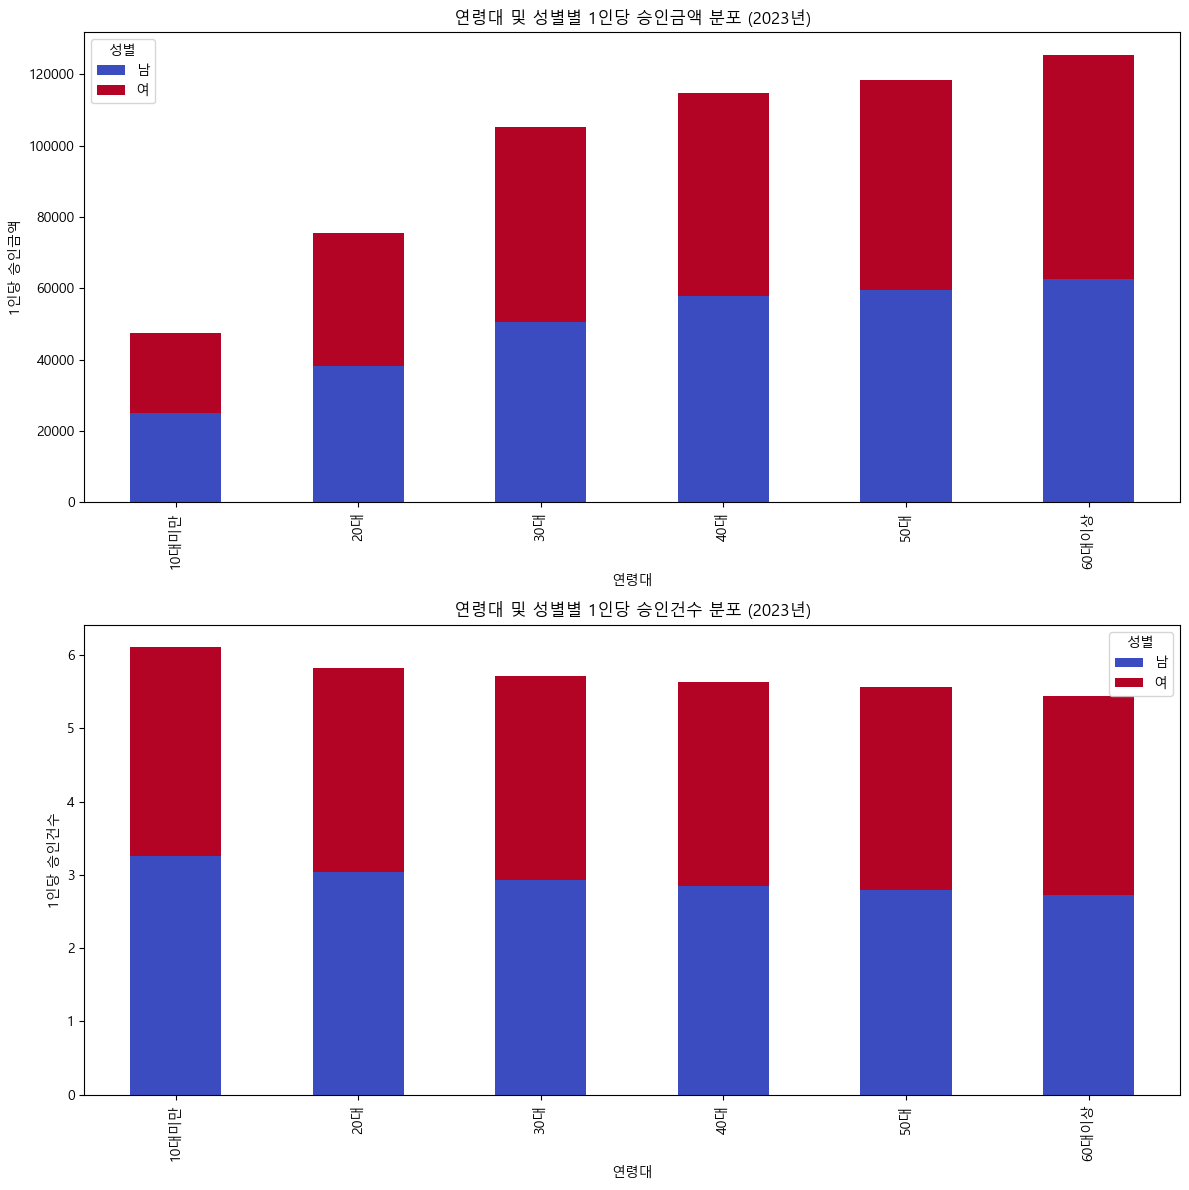

In [12]:
# 연령대 및 성별에 따른 승인금액 및 승인건수 차이 분석
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# 승인금액 분석
df_age_gender_amount = card_2023.groupby(["연령대", "성별"]).agg({"승인금액": "sum"})
df_age_gender_amount["1인당 승인금액"] = df_age_gender_amount["승인금액"] / card_2023.groupby(["연령대", "성별"]).size()
df_age_gender_amount["1인당 승인금액"].unstack().plot(kind="bar", stacked=True, colormap="coolwarm", ax=axes[0])
axes[0].set_title("연령대 및 성별별 1인당 승인금액 분포 (2023년)")
axes[0].set_ylabel("1인당 승인금액")

# 승인건수 분석
df_age_gender_count = card_2023.groupby(["연령대", "성별"]).agg({"승인건수": "sum"})
df_age_gender_count["1인당 승인건수"] = df_age_gender_count["승인건수"] / card_2023.groupby(["연령대", "성별"]).size()
df_age_gender_count["1인당 승인건수"].unstack().plot(kind="bar", stacked=True, colormap="coolwarm", ax=axes[1])
axes[1].set_title("연령대 및 성별별 1인당 승인건수 분포 (2023년)")
axes[1].set_ylabel("1인당 승인건수")

plt.tight_layout()
plt.show()

=> 2023년 기준 60대 이상 연령대가 1인당 승인금액이 가장 높았다는 것이 흥미로움. 미성년자, 학생들은 소액으로 많은 장소들을 돌아다니면서 결제를 요청하기 때문에 1인당 승인건수는 10대 미만이 가장 높게 나온 것 같다.

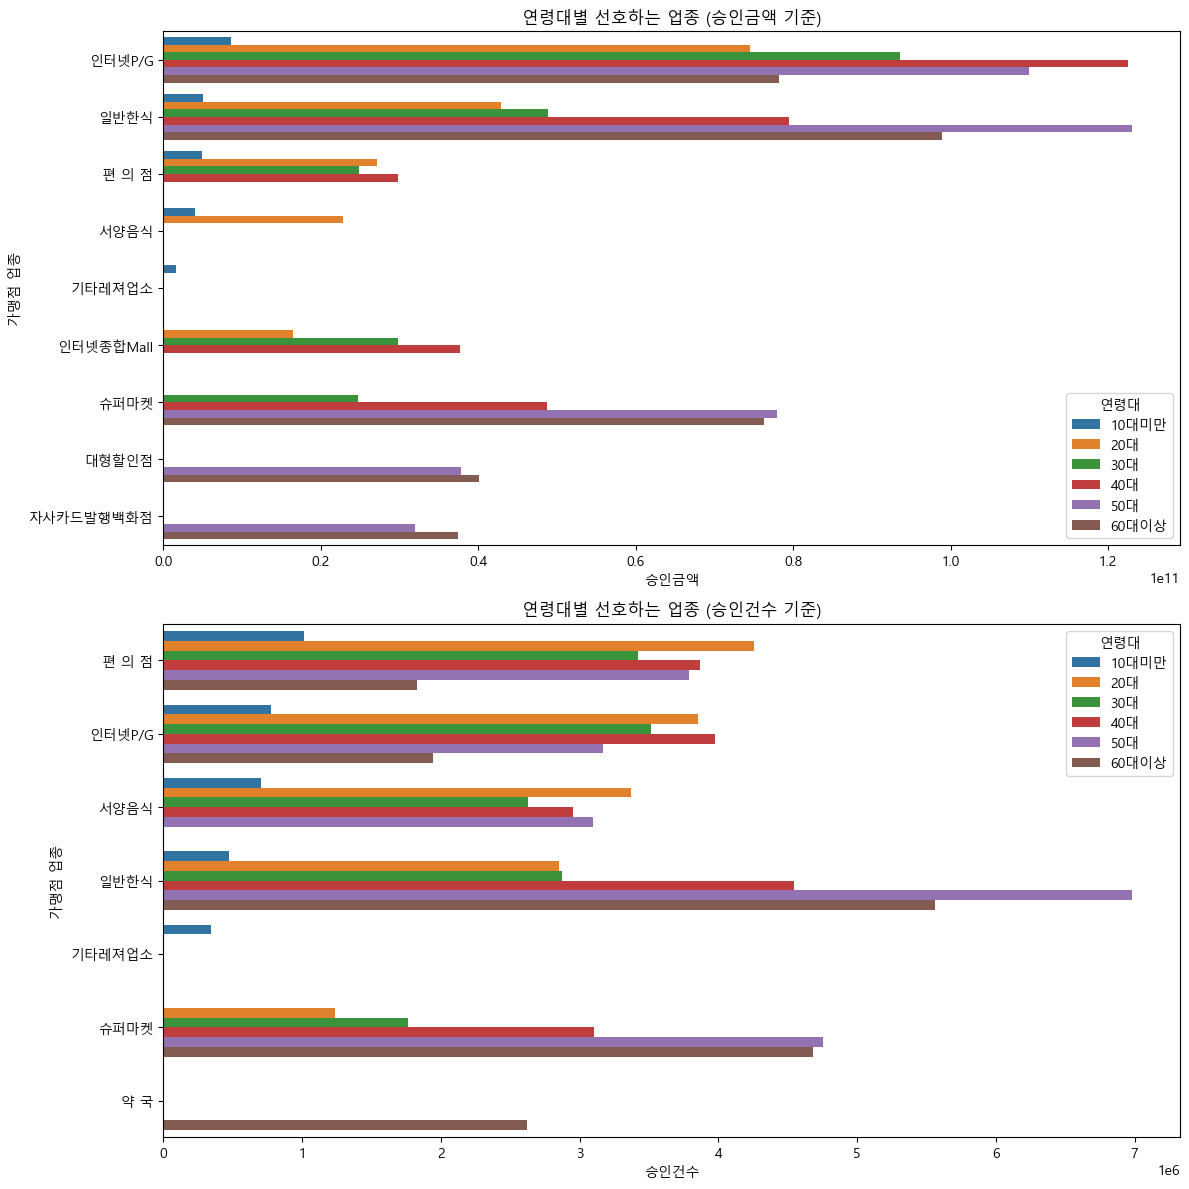

In [11]:
# 연령대별 선호하는 업종 분석
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# 승인금액 기준 상위 5개 업종 선정 (모든 연령대 포함)
df_top_categories = card_2023.groupby(["연령대", "가맹점업종명"]).agg({"승인금액": "sum"}).reset_index()
df_top_categories = df_top_categories.sort_values(["연령대", "승인금액"], ascending=[True, False])
df_top_categories = df_top_categories.groupby("연령대").head(5)

sns.barplot(data=df_top_categories, x="승인금액", y="가맹점업종명", hue="연령대", dodge=True, ax=axes[0])
axes[0].set_title("연령대별 선호하는 업종 (승인금액 기준)")
axes[0].set_xlabel("승인금액")
axes[0].set_ylabel("가맹점 업종")

# 승인건수 기준 상위 5개 업종 선정 (모든 연령대 포함)
df_top_categories_count = card_2023.groupby(["연령대", "가맹점업종명"]).agg({"승인건수": "sum"}).reset_index()
df_top_categories_count = df_top_categories_count.sort_values(["연령대", "승인건수"], ascending=[True, False])
df_top_categories_count = df_top_categories_count.groupby("연령대").head(5)

sns.barplot(data=df_top_categories_count, x="승인건수", y="가맹점업종명", hue="연령대", dodge=True, ax=axes[1])
axes[1].set_title("연령대별 선호하는 업종 (승인건수 기준)")
axes[1].set_xlabel("승인건수")
axes[1].set_ylabel("가맹점 업종")

plt.tight_layout()
plt.show()

=> 연령대별 승인금액 상위 5개 업종, 승인건수 상위 5개 업종을 각각 바로 표시한 것이다. 승인금액 기준으로는 10-40대 까지는 인터넷P/G로 가장 많은 금액을 사용했지만, 50대부터는 그렇지 않고 일반한식 업종에 가장 많은 금액을 사용했다.  
=> 승인건수 기준으로는 10대와 20대는 편의점에서 가장 많은 결제를 요청했고, 30-40대는 근소하게 인터넷P/G가 편의점보다 결제 횟수가 높았다.  
50대 이상은 일반한식 결제횟수가 압도적으로 높았고, 슈퍼마켓이 다음으로 높았다.

### 고객등급별 소비 특성
- 고객등급별 승인금액 분포 분석 
- 고객등급별 선호 업종 분석 

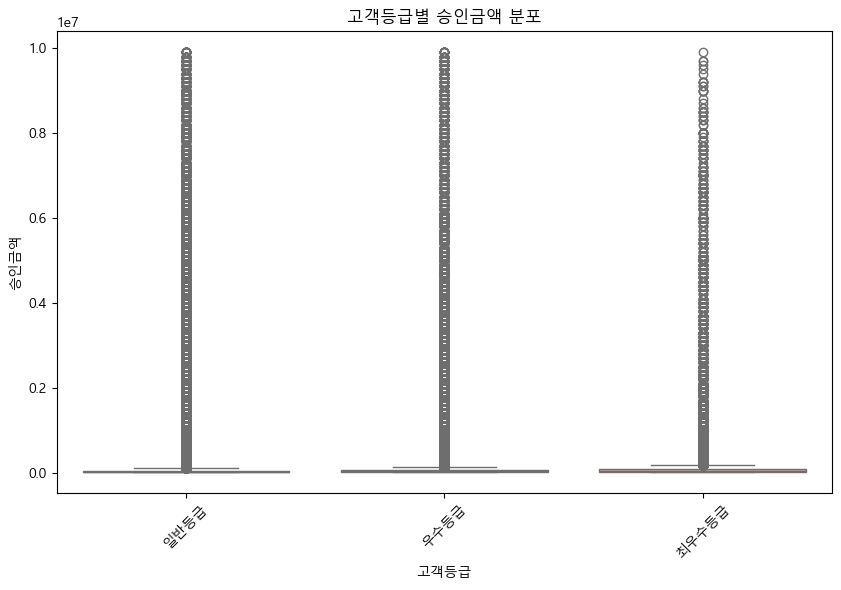

In [9]:
# 고객등급별 소비 특성 분석
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.boxplot(data=card_2023, x="고객등급", y="승인금액", palette="coolwarm")
ax.set_title("고객등급별 승인금액 분포")
ax.set_xlabel("고객등급")
ax.set_ylabel("승인금액")
plt.xticks(rotation=45)
plt.show()

=> 고객의 등급에 따라서 1회 승인금액에 대한 차이는 보이지 않았다.

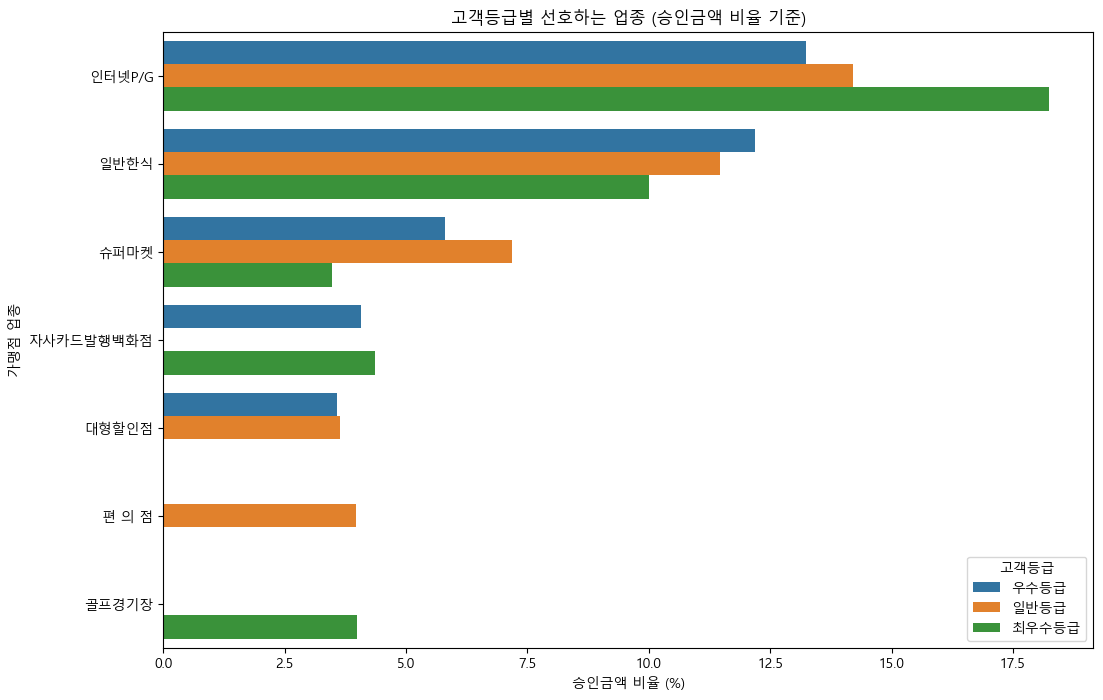

In [10]:
# 고객등급별 선호하는 업종 분석 (2023년 기준)
df_top_categories_grade = card_2023.groupby(["고객등급", "가맹점업종명"]).agg({"승인금액": "sum"}).reset_index()
df_total_amount = card_2023.groupby("고객등급")["승인금액"].sum().reset_index()
df_total_amount = df_total_amount.rename(columns={"승인금액": "총승인금액"})
df_top_categories_grade = df_top_categories_grade.merge(df_total_amount, on="고객등급")
df_top_categories_grade["승인금액비율"] = df_top_categories_grade["승인금액"] / df_top_categories_grade["총승인금액"] * 100

# 등급별로 승인금액 비율 기준 상위 5개 업종 선정
df_top_categories_grade = df_top_categories_grade.sort_values(["고객등급", "승인금액비율"], ascending=[True, False])
df_top_categories_grade = df_top_categories_grade.groupby("고객등급").head(5)

# 시각화
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=df_top_categories_grade, x="승인금액비율", y="가맹점업종명", hue="고객등급", dodge=True, ax=ax)
ax.set_title("고객등급별 선호하는 업종 (승인금액 비율 기준)")
ax.set_xlabel("승인금액 비율 (%)")
ax.set_ylabel("가맹점 업종")
plt.legend(title="고객등급")
plt.show()

=> 등급에 따라서 선호하는 업종은 유사하면서도 확연히 빈부 격차가 보이는 점도 존재했다.  

=> 모든 등급에서 인터넷P/G의 승인금액 비율이 가장 높았고, 두 번째로 높은 것도 일반한식으로 같았다. 다양한 생활용품과 서비스를 인터넷 결제대행으로 구매를 하고 일반한식을 주로 하여 식사를 해결하는 생활 패턴은 등급에 따라 다르지 않았다는 것이다.  
=> 하지만 자사카드발행백화점 업종의 경우 일반등급 고객이 소비한 금액은 거의 없다고 나왔고, 대형할인점은 반대로 최우수등급 고객이 소비한 금액이 없었다.  
또한 편의점은 일반등급에서만 승인금액이 있었고, 골프경기장 업종은 최우수등급 고객에서만 승인금액이 있었다.  
최우수등급 고객들은 대형할인점을 이용할 필요가 없을 정도로 여유롭고, 편의점도 이용하지 않고, 고객의 대다수를 차지하는 일반등급은 편의점을 적극 이용하고, 골프경기장은 가지 않는다는 점에서 차이가 확연히 드러난다.

### 대출금액과 소비 행태의 관계

- 대출금액 규모별 승인금액 차이, 관계
- 대출이 많은 고객이 특정 업종에서 더 소비하는 경향이 있는지 분석

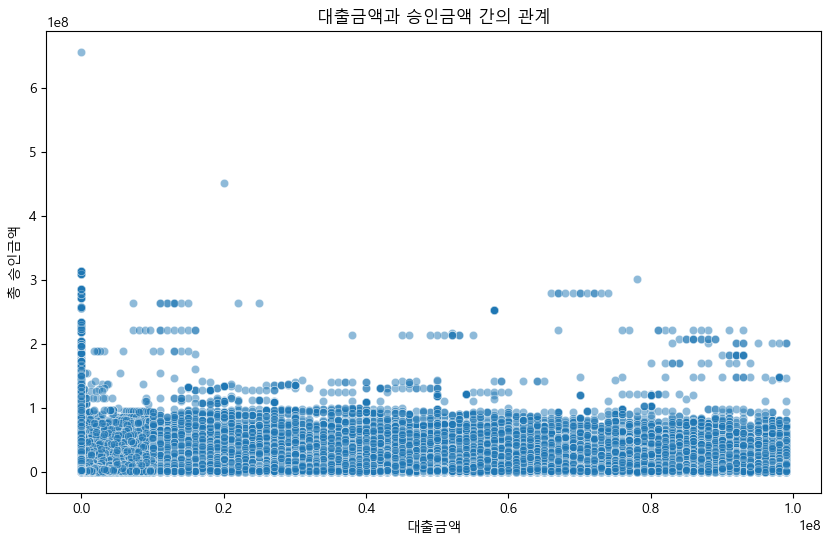

In [11]:
# 금융상품 보유 여부와 대출금액에 따른 소비 행태 분석 (2023년 기준)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_2023, x="대출금액", y=customer_2023["고객ID"].map(card_2023.groupby("고객ID")["승인금액"].sum()), alpha=0.5)
plt.title("대출금액과 승인금액 간의 관계")
plt.xlabel("대출금액")
plt.ylabel("총 승인금액")
plt.show()

=> 대출금액이 높은 고객이 더 많이 소비하는지 확인하려 했는데, 그렇지는 않았다.

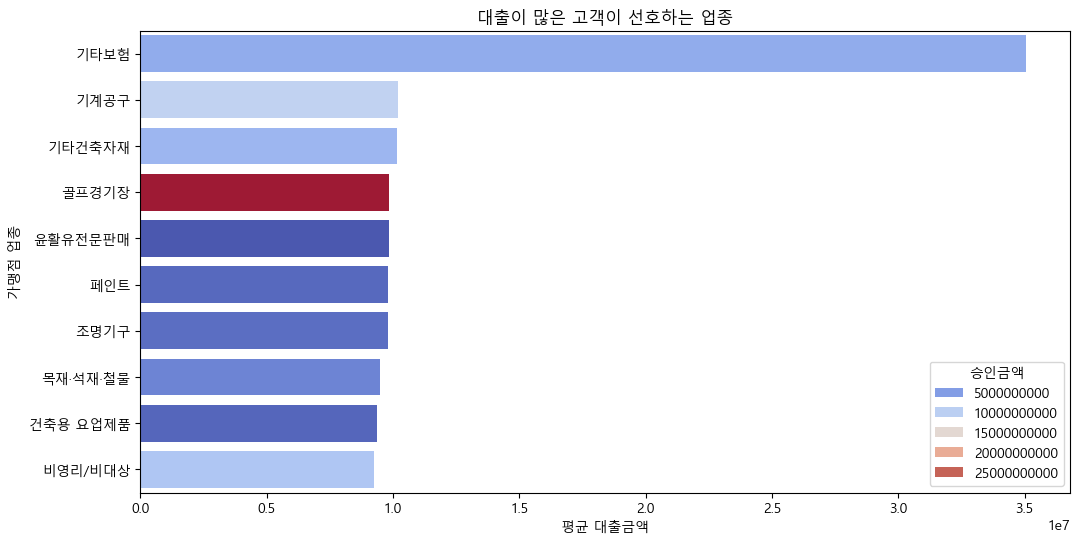

In [6]:
# 고객ID별 최신 데이터 선택 (기준년월이 가장 최근인 데이터)
latest_customer_data = customer_2023.sort_values(by="기준년월").groupby("고객ID").last()

# 카드 거래 데이터에 대출금액 정보 추가
card_2023["대출금액"] = card_2023["고객ID"].map(latest_customer_data["대출금액"])

# 대출이 많은 고객이 특정 업종에서 더 소비하는 경향 분석 (2023년 12월 기준)
df_loan_spending = card_2023.groupby(["가맹점업종명"]).agg({"대출금액": "mean", "승인금액": "sum"}).reset_index()
df_loan_spending = df_loan_spending.sort_values("대출금액", ascending=False).head(10)

# 시각화
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_loan_spending, x="대출금액", y="가맹점업종명", hue="승인금액", dodge=False, palette="coolwarm", ax=ax)
ax.set_title("대출이 많은 고객이 선호하는 업종")
ax.set_xlabel("평균 대출금액")
ax.set_ylabel("가맹점 업종")
plt.show()

=> 빨간색에 가까울 수록 더 많은 금액을 소비한 것이고, 파란색에 가까울 수록 적은 금액을 소비한 것인데, 색깔이 진해지고 연해지는 것도 일관적이지 않고, 가장 소비가 많았던 골프경기장도 중간에 껴있는 것을 보면 대출이 많을수록 특정 업종에서 더 소비하는 그러한 경향은 관찰되지 않는 것 같다. 
=> 기타보험 업종에서 결제를 하는 고객들은 대출금액이 평균적으로 높다는 것을 알 수 있었다. 이유는 잘 모르겠다.

## 5. 상관분석

### 승인금액과 대출금액 간의 상관관계

평균 승인금액과 대출금액 간의 Pearson 상관계수:
          평균승인금액      대출금액
평균승인금액  1.000000  0.061476
대출금액    0.061476  1.000000


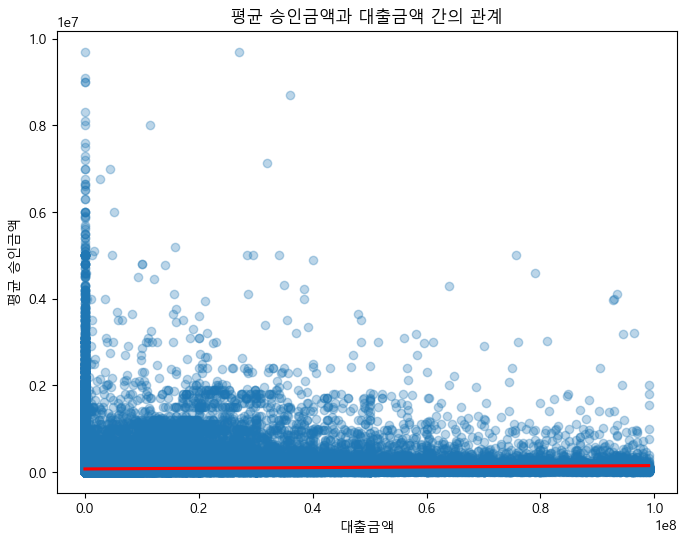

In [7]:
# 고객별 평균 승인금액 계산 (2023년 기준)
customer_avg_spend = card_2023.groupby("고객ID")["승인금액"].mean().reset_index()
customer_avg_spend = customer_avg_spend.rename(columns={"승인금액": "평균승인금액"})

# 고객 데이터에서 대출금액 추출 후 매핑
customer_loan_data = customer_2023[["고객ID", "대출금액"]].drop_duplicates()
customer_loan_data = customer_loan_data.groupby("고객ID")["대출금액"].mean().reset_index()

# 승인금액과 대출금액을 고객 단위에서 결합
customer_financial_data = customer_avg_spend.merge(customer_loan_data, on="고객ID", how="inner")

# 승인금액과 대출금액 간의 상관관계 분석
correlation = customer_financial_data[["평균승인금액", "대출금액"]].corr(method='pearson')
print("평균 승인금액과 대출금액 간의 Pearson 상관계수:")
print(correlation)

# 산점도 및 회귀선 시각화
plt.figure(figsize=(8, 6))
sns.regplot(data=customer_financial_data, x="대출금액", y="평균승인금액", scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("평균 승인금액과 대출금액 간의 관계")
plt.xlabel("대출금액")
plt.ylabel("평균 승인금액")
plt.show()

=> 카드 거래 데이터의 승인금액 컬럼과 고객 데이터의 대출금액 컬럼의 관계를 확인하기 위해서는 고객 데이터에서 월별 대출금액을 가져와 평균을 내고, 고객별 평균 승인금액과 매칭하는 방식이 필요하다.

1년을 범위로 고객별로 평균을 내어 본 상관관계는 거의 없다고 봐도 무방하게 나왔다.


텍스트형 변수가 대부분이고 금융상품 관련 변수는 0이 많은 희소 변수라 의미있는 상관관계는 나오지 않을 것 같아 여기서 마무리한다.

# 개인 주제 선정 : 소비 패턴 기반 최적의 카드 혜택 추천

## ✅ 개인 프로젝트 진행 단계

### 1️⃣ 데이터 전처리 & 소비 패턴 변수 생성

- 승인금액, 승인건수 등 기본 변수 정리
- 업종별 소비 비율, 업종 카테고리 등 추가 파생변수 생성

### 2️⃣ 클러스터링 적용

- K-Means 기법으로 최적의 군집 개수 선택
- 각 그룹의 소비 패턴 특성 분석

### 3️⃣ 그룹별 소비 특징 정리 & 카드 추천 전략 수립

- 클러스터별 시각화 (예: 업종별 소비 비율 비교)
- 각 그룹에 맞는 카드 혜택 및 추천 카드 선정

In [8]:
# 1년치 데이터만 사용 (2023년 데이터 기준)
card_data = card_2023

# 고객별 승인금액 및 승인건수 집계
grouped = card_data.groupby(['고객ID', '가맹점업종명'])[['승인금액', '승인건수']].sum().reset_index()

# 업종별 승인금액 비율 계산
total_spent = grouped.groupby('고객ID')['승인금액'].sum().reset_index()
total_spent.rename(columns={'승인금액': '총승인금액'}, inplace=True)
grouped = grouped.merge(total_spent, on='고객ID', how='left')
grouped['업종별 소비 비율'] = grouped['승인금액'] / grouped['총승인금액']

# 최종 분석용 데이터 생성
final_df = grouped.pivot(index='고객ID', columns='가맹점업종명', values='업종별 소비 비율').fillna(0)
final_df['평균 승인금액'] = grouped.groupby('고객ID')['승인금액'].mean()
final_df['총 승인건수'] = grouped.groupby('고객ID')['승인건수'].sum()

# 결과 확인
final_df.head()

가맹점업종명,1급 호텔,2급 호텔,CATV,CATV홈쇼핑,DP&E,E1가스충전소,GS가스충전소,GS주유소,LPG취급점,PG상품권,...,헬스클럽,현대정유(오일뱅크),현대정유가스충전소,홍삼제품,화물운송,화방·표구점,화원,화장품,평균 승인금액,총 승인건수
고객ID,,,,,,,,,,,,,,,,,,,,,
2002967708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105000.000000,5.0
2004066711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.000000,2.5
2004166649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36666.666667,15.0
2004326617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.000000,2.5
2004432929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230000.000000,5.0


=> 평균 승인금액과 총 승인건수를 제외하면 가맹점업종명 종류가 204개라는 것이다. 이대로면 차원이 너무 커서 클러스터링이 어렵다.
메모리 사용량도 커지고, 고객 수에 따라 데이터 크기가 너무 커질 수 있음.

=> 해결 방법

✅ 업종 카테고리 개수를 줄이는 방법

1️⃣ 유사 업종끼리 묶기

🔹 업종 그룹화 방법 (예시)

✅ 음식 관련 업종 -
'한식', '중식', '일식·회집', '서양음식', '갈비전문점', '한정식' → '외식'

✅ 쇼핑 관련 업종 -
'백화점', '대형할인점', '슈퍼마켓', '편의점', '인터넷Mall' → '쇼핑'

✅ 교통 관련 업종 -
'주유소', '고속버스', '철도', '택시', '항공사' → '교통'

✅ 레저 & 엔터테인먼트 -
'영화관', '노래방', '골프경기장', '스크린골프', '볼링장' → '레저'

#### 1️⃣ 데이터 전처리 & 소비 패턴 변수 생성

In [14]:
# 카테고리 그룹화를 적용하기

card_data = card_2023

# 업종 카테고리 매핑 딕셔너리 정의
category_mapping = {
    '외식': ['한식', '중식', '일식·회집', '서양음식', '갈비전문점', '한정식'],
    '쇼핑': ['백화점', '대형할인점', '슈퍼마켓', '편의점', '인터넷Mall'],
    '교통': ['주유소', '고속버스', '철도', '택시', '항공사'],
    '레저': ['영화관', '노래방', '골프경기장', '스크린골프', '볼링장'],
    '의료': ['병 원(응급실운영)', '의 원', '치과병원', '한 의 원', '한방병원'],
    '교육': ['학원', '보습학원', '예·체능계학원', '외국어학원', '학습지교육'],
    '기타': ['기타1', '기타4', '기타의류', '기타잡화', '기타전기제품']
}

# 가맹점업종명을 대분류로 매핑하는 함수
def map_category(merchant):
    for category, keywords in category_mapping.items():
        if merchant in keywords:
            return category
    return '기타'

card_data['업종_대분류'] = card_data['가맹점업종명'].apply(map_category)

# 고객별 승인금액 및 승인건수 집계
grouped = card_data.groupby(['고객ID', '업종_대분류'])[['승인금액', '승인건수']].sum().reset_index()

# 업종별 승인금액 비율 계산
total_spent = grouped.groupby('고객ID')['승인금액'].sum().reset_index()
total_spent.rename(columns={'승인금액': '총승인금액'}, inplace=True)
grouped = grouped.merge(total_spent, on='고객ID', how='left')
grouped['업종별 소비 비율'] = grouped['승인금액'] / grouped['총승인금액']

# 최종 분석용 데이터 생성
final_df = grouped.pivot(index='고객ID', columns='업종_대분류', values='업종별 소비 비율').fillna(0)
final_df['평균 승인금액'] = grouped.groupby('고객ID')['승인금액'].mean()
final_df['총 승인건수'] = grouped.groupby('고객ID')['승인건수'].sum()

# 결과 확인
final_df.head()

업종_대분류,교육,교통,기타,레저,쇼핑,외식,의료,평균 승인금액,총 승인건수
고객ID,,,,,,,,,
2002967708,0.0,0.000000,0.047619,0.0,0.952381,0.0,0.0,105000.000000,5.0
2004066711,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,40000.000000,2.5
2004166649,0.0,0.272727,0.136364,0.0,0.590909,0.0,0.0,73333.333333,15.0
2004326617,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,10000.000000,2.5
2004432929,0.0,0.000000,0.695652,0.0,0.304348,0.0,0.0,230000.000000,5.0


=> 업종별로 대분류를 만들어 컬럼 개수를 9개로 줄였기 때문에 클러스터링이 수월하고 더 효과적으로 작동할 것이다.

In [20]:
final_df.shape

(736496, 10)

=> 73만개면은 클러스터링 하기에 너무 많기 때문에 최적의 클러스터 개수 K를 찾는 것은 실행시간이 너무 길어져서 적절하게 샘플링하여 최적의 K를 구한다.

#### 2️⃣ 클러스터링 적용

inertia, silhouette_score updated if K :  2
inertia, silhouette_score updated if K :  3
inertia, silhouette_score updated if K :  4
inertia, silhouette_score updated if K :  5
inertia, silhouette_score updated if K :  6
inertia, silhouette_score updated if K :  7
inertia, silhouette_score updated if K :  8
inertia, silhouette_score updated if K :  9
inertia, silhouette_score updated if K :  10


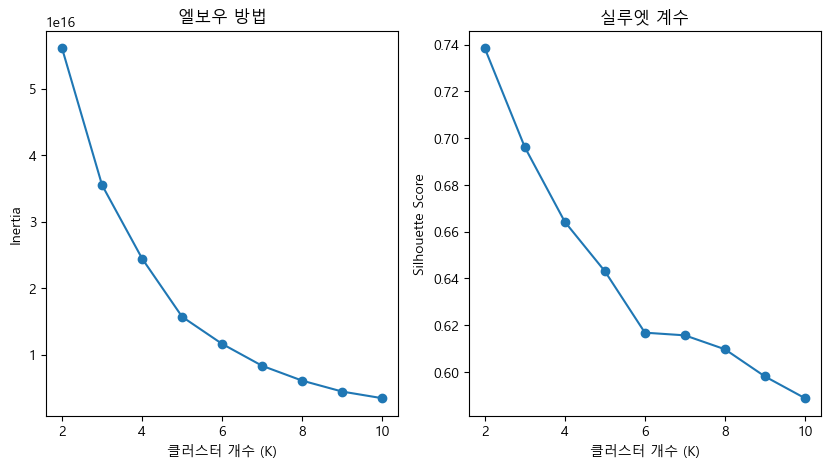

업종_대분류,교육,교통,기타,레저,쇼핑,외식,의료,평균 승인금액,총 승인건수,클러스터
고객ID,,,,,,,,,,
2002967708,0.0,0.000000,0.047619,0.0,0.952381,0.0,0.0,105000.000000,5.0,0
2004066711,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,40000.000000,2.5,0
2004166649,0.0,0.272727,0.136364,0.0,0.590909,0.0,0.0,73333.333333,15.0,0
2004326617,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,10000.000000,2.5,0
2004432929,0.0,0.000000,0.695652,0.0,0.304348,0.0,0.0,230000.000000,5.0,0


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 최적 K 찾기 (엘보우 방법 및 실루엣 계수) - 샘플링 적용
sample_size = int(len(final_df) * 0.05) # 랜덤 샘플링 5%
sample_df = final_df.sample(n=sample_size, random_state=42)

inertia = []
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(sample_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(sample_df, kmeans.labels_))
    print("inertia, silhouette_score updated if K : ", k)

# 엘보우 방법 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('클러스터 개수 (K)')
plt.ylabel('Inertia')
plt.title('엘보우 방법')

# 실루엣 계수 시각화
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('클러스터 개수 (K)')
plt.ylabel('Silhouette Score')
plt.title('실루엣 계수')
plt.show()

# 최적 K 선택 후 K-Means 적용
optimal_k = 4  # 엘보우 및 실루엣 결과에 따라 설정 (우선 임의로 4 설정)
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_df['클러스터'] = kmeans.fit_predict(final_df)

# 결과 확인
final_df.head()

실루엣 평균값이 크면서 급격하게 감소하기 전, 그리고 엘보우 방법에서의 엘보우와 가장 유사한 포인트를 찾는다고 한다면, K는 4, 5가 가장 적절해보인다.

In [24]:
# 최적 K 선택 후 K-Means 적용
optimal_k = 5  # 엘보우 및 실루엣 결과에 따라 최적 K 값을 5로 설정
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_df['클러스터'] = kmeans.fit_predict(final_df)

# 결과 확인
final_df.head()

업종_대분류,교육,교통,기타,레저,쇼핑,외식,의료,평균 승인금액,총 승인건수,클러스터
고객ID,,,,,,,,,,
2002967708,0.0,0.000000,0.047619,0.0,0.952381,0.0,0.0,105000.000000,5.0,1
2004066711,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,40000.000000,2.5,1
2004166649,0.0,0.272727,0.136364,0.0,0.590909,0.0,0.0,73333.333333,15.0,1
2004326617,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,10000.000000,2.5,1
2004432929,0.0,0.000000,0.695652,0.0,0.304348,0.0,0.0,230000.000000,5.0,1


#### 클러스터별 특징 분석

##### 📊 1. 클러스터별 평균 승인금액 & 총 승인건수 비교

In [25]:
cluster_summary = final_df.groupby('클러스터')[['평균 승인금액', '총 승인건수']].mean()
print(cluster_summary)

업종_대분류       평균 승인금액      총 승인건수
클러스터                            
0       1.885034e+06  444.333198
1       4.184141e+05  115.616069
2       1.181903e+07  975.094255
3       4.515491e+06  750.976986
4       5.023024e+07  732.156489


##### 🎯 2. 업종별 소비 비율 비교

In [27]:
category_means = final_df.groupby('클러스터').mean().drop(columns=['평균 승인금액', '총 승인건수'])
print(category_means)

업종_대분류        교육        교통        기타        레저        쇼핑        외식        의료
클러스터                                                                        
0       0.008917  0.026153  0.757519  0.008286  0.117351  0.032974  0.048801
1       0.005267  0.034454  0.736571  0.007040  0.122967  0.054140  0.039561
2       0.007663  0.020645  0.837835  0.012894  0.082934  0.015327  0.022703
3       0.010406  0.023470  0.791210  0.012102  0.097796  0.023880  0.041137
4       0.001789  0.003142  0.953616  0.003713  0.032294  0.004232  0.001213


✨ 클러스터별 주요 특징 정리

클러스터 4 (초고액 소비자)

평균 승인금액: 약 5억 (가장 높음)
총 승인건수: 732건
기타 업종 소비 비율 95% → 특정 업종에 대한 소비 집중도가 낮음
💡 맞춤 카드 추천: 프리미엄 카드 (VIP 혜택, 마일리지 적립, 해외 사용 혜택)

클러스터 2 (고액+다건 소비자)

평균 승인금액: 약 1.2억
총 승인건수: 975건 (최다)
기타 업종 소비 비율 83%, 쇼핑과 교통 비중 상대적으로 높음
💡 맞춤 카드 추천: 백화점·대형 쇼핑몰 적립 카드, 교통비 할인 카드

클러스터 3 (중간 소비자)

평균 승인금액: 약 4.5천만 원
총 승인건수: 751건
기타 업종 소비 비율 79%, 쇼핑·교통·외식도 어느 정도 분포
💡 맞춤 카드 추천: 라이프스타일 맞춤 카드 (외식·쇼핑 할인)

클러스터 0, 1 (소액 소비자)

평균 승인금액: 188만 원(0번), 41만 원(1번)
총 승인건수: 444건(0번), 115건(1번) → 상대적으로 적음
기타 업종 소비 비율 75% 이상
💡 맞춤 카드 추천: 기본 캐시백 카드 또는 소액 소비 맞춤 카드

##### 📈 3. 시각화: 클러스터별 업종 소비 패턴

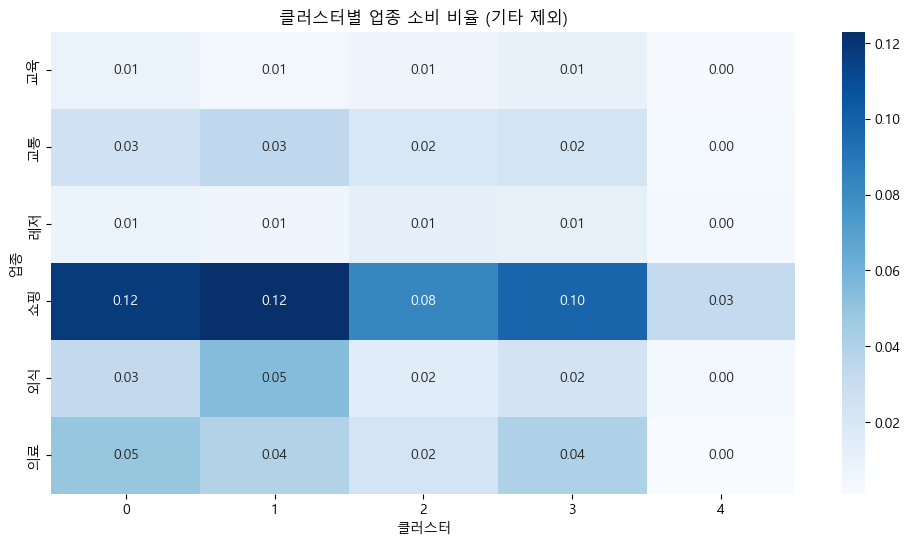

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

category_means_filtered = category_means.drop(columns=['기타'])
plt.figure(figsize=(12, 6))
sns.heatmap(category_means_filtered.T, cmap='Blues', annot=True, fmt=".2f")
plt.xlabel('클러스터')
plt.ylabel('업종')
plt.title('클러스터별 업종 소비 비율 (기타 제외)')
plt.savefig('클러스터별 업종 소비 비율 (기타 제외).png')
plt.show()


쇼핑 업종에서 클러스터별로 확연한 차이가 보인다. 특히 클러스터 0, 1, 3에서 쇼핑 비중이 상대적으로 높고, 클러스터 4는 거의 모든 업종에서 소비 비율이 낮은 것 같다.

📊 주요 인사이트

클러스터 0 & 1: 쇼핑(0.12) 비중이 가장 높음. 외식(0.030.05), 의료(0.040.05) 소비도 일정 부분 존재.

추정 소비자 특성: 소비 성향이 강한 고객층 (쇼핑 및 외식 지출이 많음)
추천 카드: 백화점 할인, 대형마트 적립, 외식 혜택 카드

클러스터 2 & 3: 쇼핑 비율이 0.08~0.10로 다소 낮아짐.

추정 소비자 특성: 균형 잡힌 소비 패턴, 특정 업종 집중도가 낮음
추천 카드: 전반적인 할인/적립 혜택이 있는 카드

클러스터 4: 전 업종에서 소비 비율이 가장 낮음.

추정 소비자 특성: 카드 사용 빈도가 낮거나, 특정 카테고리에서 집중 소비하지 않음
추천 카드: 연회비가 낮거나, 특정 혜택보다는 기본 캐시백이 높은 카드

#### 📌 정리 - <각 클러스터의 소비 성향에 맞춘 최적의 카드 혜택 추천 전략>


1️⃣ 클러스터 0

특징: 중간 정도 승인금액(약 188만 원), 승인건수 높음 (444건)
소비 패턴: 쇼핑(12%), 의료(5%), 외식(3%) 비율이 상대적으로 높음
추천 카드:
쇼핑 할인 카드 (백화점, 대형마트, 온라인몰 할인 제공)
병원·약국 할인 카드 (의료비 할인 혜택 포함)
외식 할인 카드 (프랜차이즈 및 음식점 할인)

2️⃣ 클러스터 1

특징: 낮은 승인금액(약 41만 원), 승인건수 적음 (115건)
소비 패턴: 쇼핑(12%), 의료(4%), 외식(5%)
추천 카드:
소액 결제 최적화 카드 (교통비·편의점·카페 할인)
기본 할인형 카드 (모든 가맹점에서 1~2% 캐시백)
온라인 쇼핑 특화 카드 (무이자 할부 및 적립 혜택)

3️⃣ 클러스터 2

특징: 높은 승인금액(약 1,181만 원), 승인건수 많음 (975건)
소비 패턴: 기타(83%) 비중이 높아 특정 업종에 집중된 소비 경향
추천 카드:
프리미엄 카드 (고급 레스토랑, 여행, 공항 라운지 혜택)
법인·비즈니스 카드 (출장·업무 관련 지출 최적화)
대형 지출 맞춤 카드 (대형 결제 시 캐시백·포인트 적립 우대)
                           
4️⃣ 클러스터 3
                           
특징: 높은 승인금액(약 451만 원), 승인건수 많음 (750건)
소비 패턴: 쇼핑(10%), 의료(4%), 외식(2%)
추천 카드:
쇼핑 특화 카드 (백화점·온라인 쇼핑 할인율 높음)
포인트 적립형 카드 (모든 소비에 포인트 적립 제공)
패밀리 혜택 카드 (대형마트·교육·육아 관련 할인)
                           
5️⃣ 클러스터 4
                           
특징: 초고액 승인금액(약 5억 원), 승인건수 높음 (732건)
소비 패턴: 기타(95%)가 대부분 → 특정 대형 거래 고객
추천 카드:
VVIP 카드 (프리미엄 서비스, 컨시어지 제공)
기업·법인 카드 (대규모 지출 최적화)
투자·재테크 카드 (포인트 환급 및 금융상품 혜택)
